In [21]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [22]:
def get_UCIHAR(paths):
    colnames = ['subject', 'x_acc', 'y_acc', 'z_acc', 'x_gyro', 'y_gyro', 'z_gyro', 'x_total_acc', 'y_total_acc', 'z_total_acc', 'activity']
    cols = {col: None for col in colnames}
    for i, path in enumerate(paths):
        col_data = []
        with open(path) as file:
            for row in file:
                if (i == 0 or i == 10):
                    col_data.append(int(row))
                else:
                    data = re.findall(r'[\\+|-]?[1-9]\.[0-9]+e[+|-][0-9]+', row)
                    data_vec = np.array([float(element) for element in data])
                    col_data.append(data_vec)
        cols[colnames[i]] = col_data
    data = pd.DataFrame.from_dict(cols)
    return data
                

In [23]:
#train_paths
train_paths = ['../Data/UCI HAR Dataset/train/subject_train.txt',
                '../Data/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',
                '../Data/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt', 
                '../Data/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt',
                '../Data/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt',
                '../Data/UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt',
                '../Data/UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt',
                '../Data/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt',
                '../Data/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', 
                '../Data/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt',
                '../Data/UCI HAR Dataset/train/y_train.txt'
              ]

test_paths = ['../Data/UCI HAR Dataset/test/subject_test.txt',
                '../Data/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt',
                '../Data/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt', 
                '../Data/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt',
                '../Data/UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt',
                '../Data/UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt',
                '../Data/UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt',
                '../Data/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt',
                '../Data/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt', 
                '../Data/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt',
                '../Data/UCI HAR Dataset/test/y_test.txt'
              ]
train_data = get_UCIHAR(train_paths)
test_data = get_UCIHAR(test_paths)

470.75

In [74]:
test_data.head(5)

subject                                              x_acc  \
0        2  [0.01165315, 0.01310909, 0.01126885, 0.0278307...   
1        2  [0.009279629, 0.004929711, 0.003953596, 0.0092...   
2        2  [0.005731945, 0.00706565, 0.005109758, 0.00243...   
3        2  [0.0004519467, 0.0006039382, -0.002484562, -0....   
4        2  [-0.004362379, -0.002765392, -0.004904784, -0....   

                                               y_acc  \
0  [-0.02939904, -0.03972867, -0.05240586, -0.052...   
1  [0.00665052, 0.01864973, 0.0155395, -0.0005741...   
2  [0.007304842, 0.007330912, 0.007153458, 0.0066...   
3  [-0.02380645, -0.02205069, -0.007101194, 0.004...   
4  [-0.009464754, -0.008671401, -0.006774347, -0....   

                                               z_acc  \
0  [0.1068262, 0.1524549, 0.2168462, 0.2025812, 0...   
1  [-0.02631933, -0.02688753, -0.03663861, -0.045...   
2  [0.01021286, 0.01341419, 0.003646559, -0.00767...   
3  [-0.02700233, -0.02254782, -0.002648797, 0.022...   
4  [-0.00146104, 0.003182453, 0.004068636, 0.0024...   

                                              x_gyro  \
0  [0.4374637, 0.4682641, 0.4982574, 0.4793957, 0...   
1  [0.1702878, 0.1752221, 0.1308618, 0.07885598, ...   
2  [-0.0387265, -0.04728239, -0.05390624, -0.0594...   
3  [-0.01012762, 0.00356441, -0.008478927, -0.027...   
4  [-0.03666528, -0.0402769, -0.03994979, -0.0401...   

                                              y_gyro  \
0  [0.5313492, 0.7210685, 0.5203284, 0.3726252, 0...   
1  [-0.06137388, -0.09536355, -0.1464495, -0.1261...   
2  [-0.06024968, -0.0517562, -0.05042757, -0.0472...   
3  [0.003590409, 0.02460939, 0.02271388, -0.00596...   
4  [-0.03242742, -0.03796004, -0.04271361, -0.041...   

                                              z_gyro  \
0  [0.1365279, 0.09762239, 0.08355578, 0.02286101...   
1  [0.05509624, 0.04334361, 0.05239831, 0.0597087...   
2  [0.02928903, 0.02536597, 0.02482575, 0.0217230...   
3  [0.008402927, -0.009533039, 0.001776758, 0.023...   
4  [0.01398331, 0.02053516, 0.02336173, 0.0212167...   

                                         x_total_acc  \
0  [1.041216, 1.041803, 1.039086, 1.054768, 1.028...   
1  [0.9991921, 0.9946787, 0.9935518, 0.9986743, 1...   
2  [0.9975931, 0.9989703, 0.9970574, 0.9944241, 0...   
3  [0.994564, 0.9947269, 0.9916483, 0.9895802, 0....   
4  [0.9881504, 0.9897109, 0.9875351, 0.9877212, 0...   

                                         y_total_acc  \
0  [-0.2697959, -0.280025, -0.2926631, -0.2923837...   
1  [-0.2649349, -0.2532142, -0.2565887, -0.272951...   
2  [-0.2639912, -0.2638194, -0.2638495, -0.264179...   
3  [-0.290593, -0.2888855, -0.2739894, -0.2620996...   
4  [-0.2838965, -0.2832349, -0.2814705, -0.282318...   

                                         z_total_acc  activity  
0  [0.02377977, 0.07629271, 0.1474754, 0.1399061,...         5  
1  [0.1256164, 0.1256249, 0.1163814, 0.1075668, 0...         5  
2  [0.1507741, 0.1539427, 0.1441536, 0.132821, 0....         5  
3  [0.1111986, 0.1155026, 0.1352512, 0.1605266, 0...         5  
4  [0.1338332, 0.1385116, 0.139431, 0.1378515, 0....         5

In [16]:
train_data.dtypes

subject         int64
x_acc          object
y_acc          object
z_acc          object
x_gyro         object
y_gyro         object
z_gyro         object
x_total_acc    object
y_total_acc    object
z_total_acc    object
activity        int64
dtype: object

In [24]:
for i, columns in train_data.iterrows():
    print(columns)

subject                                                        1
x_acc          [0.0001808515, 0.01013856, 0.009275574, 0.0050...
y_acc          [0.01076681, 0.00657948, 0.008928878, 0.007488...
z_acc          [0.05556068, 0.05512483, 0.04840473, 0.0497749...
x_gyro         [0.03019122, 0.04371071, 0.0356878, 0.0404021,...
y_gyro         [0.06601362, 0.04269897, 0.07485018, 0.0573197...
z_gyro         [0.02285864, 0.01031572, 0.01324969, 0.0177512...
x_total_acc    [1.012817, 1.022833, 1.022028, 1.017877, 1.023...
y_total_acc    [-0.1232167, -0.1268756, -0.1240037, -0.124927...
z_total_acc    [0.1029341, 0.1056872, 0.1021025, 0.1065527, 0...
activity                                                       5
Name: 0, dtype: object
subject                                                        1
x_acc          [0.001093752, 0.004550077, 0.002879173, 0.0022...
y_acc          [-0.004687588, -0.007487894, -0.008429991, -0....
z_acc          [-0.02685954, -0.02509841, -0.02597534, -0.026...
x_

Name: 59, dtype: object
subject                                                        1
x_acc          [-0.004715995, -0.006435451, -0.009166207, -0....
y_acc          [0.002609077, 0.003213952, 0.004662687, 0.0069...
z_acc          [0.001560894, -0.001275368, 0.001866692, 0.000...
x_gyro         [0.00176238, 0.001802226, 0.002171002, 0.00041...
y_gyro         [0.008233267, 0.005010438, 0.001391548, 0.0020...
z_gyro         [-0.004022274, -0.004247028, 9.738761e-05, 0.0...
x_total_acc    [0.184317, 0.1826253, 0.1799213, 0.1850212, 0....
y_total_acc    [0.789145, 0.7897477, 0.7911956, 0.7934405, 0....
z_total_acc    [0.57673, 0.5738712, 0.5769896, 0.5752854, 0.5...
activity                                                       6
Name: 60, dtype: object
subject                                                        1
x_acc          [-0.0009374971, 0.0005633448, 0.0008748588, -0...
y_acc          [-0.00280095, -0.001038687, -0.0004385643, -0....
z_acc          [-0.001166565, -0.004664772

Name: 138, dtype: object
subject                                                        1
x_acc          [0.9403324, 0.7735768, 0.6086887, 0.4702043, 0...
y_acc          [-0.05093969, -0.10932, -0.1072667, 0.04302046...
z_acc          [0.06353772, 0.1281832, 0.193746, 0.1866741, 0...
x_gyro         [0.2795057, 0.5786732, 0.5663715, 0.3563104, 0...
y_gyro         [0.6588122, 0.2240855, 0.0341519, 0.05523222, ...
z_gyro         [-0.2533451, -0.3967527, -0.1633617, 0.0826183...
x_total_acc    [1.93189, 1.764704, 1.599453, 1.460707, 1.2904...
y_total_acc    [-0.3075916, -0.3654183, -0.3628587, -0.212114...
z_total_acc    [0.04481832, 0.1089284, 0.1739206, 0.1662553, ...
activity                                                       3
Name: 139, dtype: object
subject                                                        1
x_acc          [-0.5033514, -0.5980203, -0.2618785, 0.069788,...
y_acc          [0.2237813, 0.06852517, -0.1339361, -0.2598654...
z_acc          [-0.1241629, 0.1581337, 0

Name: 218, dtype: object
subject                                                        1
x_acc          [-0.003707182, -0.001585629, -0.0002623813, 0....
y_acc          [-0.001399463, 0.001971596, 0.0008958937, -0.0...
z_acc          [0.001570189, -0.002431433, -0.005879162, -0.0...
x_gyro         [-0.01129019, -0.01486256, -0.01261936, -0.008...
y_gyro         [-0.002819871, -0.007824217, -0.004580371, 0.0...
z_gyro         [-0.009133998, -0.01591005, -0.01891532, -0.01...
x_total_acc    [0.2988357, 0.3009372, 0.3022403, 0.3041407, 0...
y_total_acc    [0.8104837, 0.8138458, 0.8127608, 0.8116194, 0...
z_total_acc    [0.4792558, 0.4752814, 0.4718615, 0.4742155, 0...
activity                                                       6
Name: 219, dtype: object
subject                                                        1
x_acc          [0.000930432, 0.0008760486, 0.00026017, 0.0018...
y_acc          [0.003608897, 0.001544975, 0.002007266, -0.000...
z_acc          [-0.002555257, -0.0015288

Name: 299, dtype: object
subject                                                        1
x_acc          [-0.2062842, -0.1302273, 0.104053, 0.5310004, ...
y_acc          [-0.05162143, -0.1660656, -0.2766628, -0.35389...
z_acc          [0.09594987, 0.01108466, -0.179829, -0.3808833...
x_gyro         [0.1313948, -0.0263223, -0.016564, 0.1261044, ...
y_gyro         [-0.3746168, -0.0419691, 0.1244713, 0.351679, ...
z_gyro         [-0.2368422, -0.1646709, -0.2272959, -0.445022...
x_total_acc    [0.7724195, 0.8480917, 1.081891, 1.508272, 1.6...
y_total_acc    [-0.2885409, -0.4017438, -0.5111484, -0.587246...
z_total_acc    [0.007562912, -0.07768288, -0.2689229, -0.4702...
activity                                                       3
Name: 300, dtype: object
subject                                                        1
x_acc          [0.1009232, -0.2409397, -0.2722096, -0.1315116...
y_acc          [-0.2070727, -0.04465241, 0.02892302, 0.026333...
z_acc          [-0.02132853, 0.1961462, 

Name: 378, dtype: object
subject                                                        3
x_acc          [-0.01473645, -0.009679938, -0.009426523, -0.0...
y_acc          [-0.06164103, -0.07183242, -0.08162936, -0.081...
z_acc          [-0.03699424, -0.04276655, -0.04484217, -0.042...
x_gyro         [-0.01544778, -0.0176097, -0.009047644, 0.0071...
y_gyro         [-0.06523657, -0.07785711, -0.06893807, -0.044...
z_gyro         [0.150668, 0.1470568, 0.145186, 0.1440972, 0.1...
x_total_acc    [0.9997377, 1.005089, 1.005606, 1.006155, 1.00...
y_total_acc    [0.02735771, 0.01844573, 0.009774508, 0.011104...
z_total_acc    [0.2015398, 0.1971916, 0.1964426, 0.199889, 0....
activity                                                       4
Name: 379, dtype: object
subject                                                        3
x_acc          [-0.002076843, 0.001718227, 0.00454158, 0.0037...
y_acc          [-0.007378422, -0.003396374, -0.0009899474, -0...
z_acc          [-0.01362231, -0.01148989

Name: 456, dtype: object
subject                                                        3
x_acc          [-0.1900648, -0.2116894, -0.2075603, -0.107408...
y_acc          [0.1281427, 0.1462858, 0.2103611, 0.2223516, 0...
z_acc          [0.1654088, 0.183606, 0.1966519, 0.1656778, 0....
x_gyro         [-0.1945532, -0.1236087, -0.00567849, 0.009367...
y_gyro         [-0.3009288, -0.2842314, -0.299045, -0.3404222...
z_gyro         [-0.01328465, 0.009176111, 0.02605407, 0.03161...
x_total_acc    [0.8102104, 0.7886767, 0.7928424, 0.8929702, 1...
y_total_acc    [-0.1242209, -0.1060875, -0.04201946, -0.03002...
z_total_acc    [0.02196636, 0.03971318, 0.05234217, 0.0209929...
activity                                                       1
Name: 457, dtype: object
subject                                                        3
x_acc          [-0.05934223, 0.09384534, 0.1972133, 0.206619,...
y_acc          [0.2259934, 0.1789441, 0.07875034, 0.05473022,...
z_acc          [0.1581168, 0.144752, 0.1

Name: 533, dtype: object
subject                                                        3
x_acc          [-0.003125415, 0.001052257, 0.0005173027, -0.0...
y_acc          [-0.003117741, -0.002734426, -0.004467012, -0....
z_acc          [0.005833765, 0.006428864, 0.00617133, 0.00613...
x_gyro         [0.008875431, 0.009338632, 0.008952625, 0.0104...
y_gyro         [-0.006663997, -0.007596405, -0.008221018, -0....
z_gyro         [-0.0002368272, -0.00113008, 0.0004685399, -0....
x_total_acc    [1.003663, 1.007829, 1.00728, 1.005332, 1.0055...
y_total_acc    [-0.262328, -0.261967, -0.2637235, -0.2625008,...
z_total_acc    [-0.02827969, -0.02761177, -0.0277934, -0.0277...
activity                                                       5
Name: 534, dtype: object
subject                                                        3
x_acc          [0.0006234817, -0.0002021202, 0.0002311847, 0....
y_acc          [-0.0007889694, -0.002036869, -0.001581044, 0....
z_acc          [-0.003309633, -0.0049130

Name: 612, dtype: object
subject                                                        3
x_acc          [0.06781254, 0.04361969, -0.05744446, -0.13045...
y_acc          [-0.1432802, -0.1935539, -0.1874653, -0.099496...
z_acc          [-0.06816196, -0.09239162, -0.06992121, -0.023...
x_gyro         [0.2576163, 0.4324466, 0.784528, 0.7575818, 0....
y_gyro         [-0.3265049, -0.2191187, -0.1668176, -0.329938...
z_gyro         [0.03909965, 0.07450636, 0.01091307, -0.176719...
x_total_acc    [1.061401, 1.03789, 0.9375365, 0.8652577, 0.76...
y_total_acc    [-0.3795422, -0.4293174, -0.4227763, -0.334408...
z_total_acc    [-0.2288053, -0.2524241, -0.2293399, -0.182573...
activity                                                       1
Name: 613, dtype: object
subject                                                        3
x_acc          [-0.3093312, -0.2007636, -0.138186, -0.0878215...
y_acc          [0.138392, 0.08644633, 0.07272561, 0.05503978,...
z_acc          [-0.04352818, -0.1034428,

Name: 692, dtype: object
subject                                                        5
x_acc          [-0.03839848, -0.0214604, 0.01568824, 0.045302...
y_acc          [0.03849066, 0.01132198, -0.03912659, -0.04384...
z_acc          [0.06830548, 0.05791415, 0.044043, 0.03955637,...
x_gyro         [-0.1310428, -0.15463, -0.06390323, 0.01153304...
y_gyro         [-0.1220752, -0.1575505, -0.1161124, -0.003617...
z_gyro         [0.1179656, 0.1549711, 0.146478, 0.09369132, 0...
x_total_acc    [0.9741613, 0.9912124, 1.028453, 1.058138, 1.0...
y_total_acc    [0.04699646, 0.02055562, -0.02917795, -0.03319...
z_total_acc    [0.2266714, 0.2157357, 0.2013912, 0.1965011, 0...
activity                                                       5
Name: 693, dtype: object
subject                                                        5
x_acc          [-0.008981499, -0.01178714, -0.01313536, -0.01...
y_acc          [0.004267529, 0.02095658, 0.02302749, 0.019013...
z_acc          [0.005942476, 0.01200373,

Name: 770, dtype: object
subject                                                        5
x_acc          [-0.04813257, 0.01922396, 0.153506, 0.1774157,...
y_acc          [-0.3435518, -0.3563276, -0.1869959, 0.0530510...
z_acc          [0.01104486, 0.0367293, 0.009621985, -0.022514...
x_gyro         [-0.1655487, 0.08087436, 0.2229824, 0.2713428,...
y_gyro         [0.01791152, -0.03286584, 0.03860247, 0.254581...
z_gyro         [-0.4083997, -0.8475524, -0.9765809, -0.613585...
x_total_acc    [0.9759559, 1.043351, 1.177709, 1.201734, 1.09...
y_total_acc    [-0.4217963, -0.4346186, -0.2653398, -0.025363...
z_total_acc    [-0.01452022, 0.01086232, -0.01655782, -0.0490...
activity                                                       1
Name: 771, dtype: object
subject                                                        5
x_acc          [0.3116119, 0.06395337, -0.1114313, -0.2118584...
y_acc          [-0.06780731, 0.05956204, 0.1904063, 0.1354058...
z_acc          [-0.1139771, -0.0468771, 

Name: 848, dtype: object
subject                                                        5
x_acc          [-0.01612679, -0.04134389, -0.02054182, -0.003...
y_acc          [0.006454861, 0.01803301, 0.0230491, 0.0136084...
z_acc          [-0.01172118, -0.01513999, -0.02984076, -0.027...
x_gyro         [-0.04094789, -0.1259961, -0.2555121, -0.24421...
y_gyro         [0.3276128, 0.1291768, -0.04897706, 0.02568504...
z_gyro         [-0.1651077, -0.04274458, 0.03510381, 0.032429...
x_total_acc    [0.9888341, 0.9634528, 0.9841044, 1.001146, 1....
y_total_acc    [0.0042798, 0.0162006, 0.02154958, 0.01243275,...
z_total_acc    [0.2182494, 0.2155599, 0.2015186, 0.2041331, 0...
activity                                                       5
Name: 849, dtype: object
subject                                                        5
x_acc          [0.0002430665, -0.001150697, -2.569928e-06, 0....
y_acc          [-0.002655507, -0.003090706, -0.0008487467, 0....
z_acc          [-0.02537015, -0.02783915

Name: 928, dtype: object
subject                                                        5
x_acc          [-0.2201145, -0.2544813, -0.2535475, -0.170849...
y_acc          [0.05337826, 0.06743659, 0.09057761, 0.0769508...
z_acc          [0.08815438, 0.1069657, 0.0773756, 0.08135801,...
x_gyro         [-0.03360321, 0.02969961, 0.07449704, 0.188707...
y_gyro         [-0.1759734, -0.224899, -0.3308713, -0.174096,...
z_gyro         [0.1122203, 0.05857002, -0.008090197, 0.009683...
x_total_acc    [0.8032093, 0.7691607, 0.7703488, 0.8532288, 0...
y_total_acc    [-0.05963336, -0.04546831, -0.02222055, -0.035...
z_total_acc    [0.114304, 0.1330312, 0.1033732, 0.1073077, 0....
activity                                                       1
Name: 929, dtype: object
subject                                                        5
x_acc          [0.4374143, 0.4122818, 0.4049473, 0.384203, 0....
y_acc          [0.05720874, 0.100927, -0.002076729, -0.171928...
z_acc          [0.1455188, 0.1161458, 0.

Name: 1009, dtype: object
subject                                                        6
x_acc          [0.005820732, 0.00534253, 0.004429275, 0.00360...
y_acc          [-0.009626445, -0.01456391, -0.01747286, -8.47...
z_acc          [0.002247943, -0.01027294, -0.01186206, -0.008...
x_gyro         [-0.05161011, -0.07228201, -0.110014, -0.13518...
y_gyro         [0.008711974, 0.02037411, 0.01149811, -0.03844...
z_gyro         [0.03745242, -0.0004972986, -0.03087719, -0.03...
x_total_acc    [1.007381, 1.006859, 1.005904, 1.005034, 0.999...
y_total_acc    [-0.2461726, -0.250857, -0.2535172, -0.2358859...
z_total_acc    [0.1184999, 0.1063317, 0.1050938, 0.1091593, 0...
activity                                                       5
Name: 1010, dtype: object
subject                                                        6
x_acc          [-0.002390144, -0.007613686, -0.007749065, -0....
y_acc          [-0.01191456, -0.01030416, -0.002342332, -0.00...
z_acc          [0.005007907, 0.0106115

Name: 1089, dtype: object
subject                                                        6
x_acc          [0.3623375, 0.3715201, 0.2694664, 0.3000453, 0...
y_acc          [-0.05065884, -0.03674783, 0.04353474, 0.04874...
z_acc          [0.04479, 0.1009071, 0.09510204, 0.0510356, -0...
x_gyro         [-0.1994263, 0.3257845, 0.4685624, 0.25038, -0...
y_gyro         [0.2416033, 0.2767094, 0.3427418, 0.3554406, 0...
z_gyro         [0.1646841, 0.04440309, -0.01118383, 0.3912564...
x_total_acc    [1.371794, 1.380605, 1.278179, 1.308404, 1.587...
y_total_acc    [-0.2497673, -0.235745, -0.1553113, -0.1499122...
z_total_acc    [0.05638039, 0.1125828, 0.1068964, 0.06298352,...
activity                                                       1
Name: 1090, dtype: object
subject                                                        6
x_acc          [0.4983543, -0.1653401, -0.771244, -0.5662196,...
y_acc          [-0.233317, -0.272505, -0.2905481, -0.3022087,...
z_acc          [-0.03227161, 0.0052608

Name: 1169, dtype: object
subject                                                        6
x_acc          [0.1532826, 0.1814687, 0.1425942, 0.1145865, 0...
y_acc          [0.04625526, 0.06507439, 0.113537, 0.1588718, ...
z_acc          [0.05646294, -0.005283856, -0.02332265, 0.0065...
x_gyro         [0.2521053, 0.2019907, 0.0241521, -0.1777574, ...
y_gyro         [-0.3404677, -0.06564838, 0.07537794, 0.309352...
z_gyro         [-0.1172761, -0.2262133, -0.226678, -0.2017417...
x_total_acc    [1.053064, 1.080989, 1.041931, 1.013821, 0.986...
y_total_acc    [-0.2965205, -0.2785982, -0.2308825, -0.186148...
z_total_acc    [-0.2725619, -0.3347901, -0.3531768, -0.323574...
activity                                                       5
Name: 1170, dtype: object
subject                                                        6
x_acc          [0.0234234, 0.01521097, 0.01515697, 0.02132622...
y_acc          [0.01502089, 0.006658533, 0.001802806, 0.00171...
z_acc          [0.08333225, 0.07590574

Name: 1247, dtype: object
subject                                                        6
x_acc          [0.0519208, -0.06896159, -0.08762457, 0.052847...
y_acc          [-0.5459766, -0.4026422, -0.2587179, -0.116006...
z_acc          [-0.06561505, -0.01889021, 0.128246, 0.2182359...
x_gyro         [-0.586836, -0.5174753, -0.152977, 0.9381582, ...
y_gyro         [-0.1470189, 0.1298372, 0.0739339, -0.4464444,...
z_gyro         [-0.5101801, -0.7503071, -0.4612097, 0.0488268...
x_total_acc    [1.063079, 0.9420237, 0.9232423, 1.063644, 1.1...
y_total_acc    [-0.7439241, -0.6002412, -0.4559771, -0.312951...
z_total_acc    [-0.0249071, 0.02126566, 0.1678353, 0.2572497,...
activity                                                       1
Name: 1248, dtype: object
subject                                                        6
x_acc          [-0.1542361, -0.1795299, -0.2813287, -0.317449...
y_acc          [0.08011085, 0.0990853, 0.09847039, 0.08268139...
z_acc          [-0.06823086, -0.081248

Name: 1327, dtype: object
subject                                                        7
x_acc          [0.00569076, 0.003070636, -0.001511776, -0.001...
y_acc          [-0.009923169, -0.009746602, -0.006372035, -0....
z_acc          [-0.01519784, -0.01188875, -0.009156059, -0.00...
x_gyro         [-0.04298232, -0.04029868, -0.03770733, -0.034...
y_gyro         [0.007701193, -0.002888782, -0.008949513, -0.0...
z_gyro         [0.007735398, 0.01054989, 0.01157763, 0.013500...
x_total_acc    [1.020749, 1.018099, 1.013488, 1.013923, 1.012...
y_total_acc    [-0.08999611, -0.08986485, -0.08654236, -0.084...
z_total_acc    [-0.1832531, -0.1799547, -0.1772363, -0.176352...
activity                                                       5
Name: 1328, dtype: object
subject                                                        7
x_acc          [0.003443108, -0.0007514286, -0.004691447, -0....
y_acc          [0.003352672, 0.002864581, 0.002562145, 0.0027...
z_acc          [0.0007027875, 0.003991

Name: 1407, dtype: object
subject                                                        7
x_acc          [0.3173326, 0.3207729, 0.329276, 0.3270628, 0....
y_acc          [0.05640863, -0.1066874, -0.3256663, -0.387538...
z_acc          [0.1589953, 0.04139437, -0.2630265, -0.6212191...
x_gyro         [-0.02356407, 0.3079002, 0.8029626, 0.7264934,...
y_gyro         [0.004989615, -0.6512572, -0.7632298, 0.446673...
z_gyro         [0.4222858, 0.4782662, 0.5603258, 0.5192546, 0...
x_total_acc    [1.290221, 1.293302, 1.301479, 1.29899, 1.2308...
y_total_acc    [-0.06670354, -0.2297287, -0.448628, -0.510423...
z_total_acc    [-0.159966, -0.2777965, -0.5823718, -0.9406561...
activity                                                       1
Name: 1408, dtype: object
subject                                                        7
x_acc          [-0.3061216, -0.1039116, -0.01965557, -0.01775...
y_acc          [0.1988922, -0.08936493, -0.3034879, -0.305649...
z_acc          [0.07786694, -0.0694939

Name: 1489, dtype: object
subject                                                        7
x_acc          [-0.002223746, -0.0006260883, -0.00272603, -0....
y_acc          [-0.01163694, -0.01132192, -0.01348515, -0.013...
z_acc          [-0.024423, -0.02666523, -0.03218473, -0.03296...
x_gyro         [0.004522439, 0.004409329, -0.003700133, -0.01...
y_gyro         [-0.03994951, -0.03643032, -0.02765786, -0.019...
z_gyro         [-0.001634329, -0.001769311, -0.001844553, 0.0...
x_total_acc    [1.022425, 1.024039, 1.021947, 1.017255, 1.013...
y_total_acc    [-0.08838782, -0.08844003, -0.09097988, -0.091...
z_total_acc    [0.103719, 0.1011917, 0.0953687, 0.09427206, 0...
activity                                                       5
Name: 1490, dtype: object
subject                                                        7
x_acc          [0.002331425, 0.001321598, 0.002432245, 0.0012...
y_acc          [0.001889788, 0.001412337, 0.003923933, 0.0055...
z_acc          [-0.005658573, -0.00238

Name: 1568, dtype: object
subject                                                        7
x_acc          [-0.1759662, -0.1621112, -0.1554206, -0.176140...
y_acc          [-0.01782594, 0.02354241, 0.08942377, 0.114752...
z_acc          [-0.09083356, -0.01069386, -0.001318105, 0.027...
x_gyro         [0.4076048, 0.3834225, 0.5525989, 0.3601622, 0...
y_gyro         [0.02020163, -0.0890113, 0.3991762, 0.2811419,...
z_gyro         [-0.2910723, -0.3135541, -0.2603724, -0.270871...
x_total_acc    [0.8407881, 0.8546853, 0.8613986, 0.8406743, 0...
y_total_acc    [-0.1871612, -0.1461631, -0.08069007, -0.05580...
z_total_acc    [-0.09250148, -0.01227242, -0.002838098, 0.025...
activity                                                       1
Name: 1569, dtype: object
subject                                                        7
x_acc          [0.2241847, 0.2460684, 0.3153798, 0.387368, 0....
y_acc          [0.2157582, 0.1965005, 0.07557632, -0.00930445...
z_acc          [0.2133158, 0.3147927, 

Name: 1647, dtype: object
subject                                                        8
x_acc          [-0.01325406, -0.01604569, -0.01529217, -0.017...
y_acc          [0.03136156, 0.03325935, 0.02762398, 0.0205828...
z_acc          [-0.005012992, -0.008747645, -0.007497201, -0....
x_gyro         [-0.04196795, -0.03846328, -0.03899228, -0.042...
y_gyro         [-0.01938119, -0.01485714, -0.003809713, -0.00...
z_gyro         [0.06345668, 0.07500436, 0.07928594, 0.0828355...
x_total_acc    [0.7756162, 0.7728747, 0.773669, 0.7719805, 0....
y_total_acc    [0.5007987, 0.5027389, 0.4971675, 0.4902119, 0...
z_total_acc    [0.3773986, 0.3736574, 0.3749001, 0.3764064, 0...
activity                                                       4
Name: 1648, dtype: object
subject                                                        8
x_acc          [0.000352584, 0.0005838896, -5.960716e-05, 0.0...
y_acc          [-0.002164715, -0.001288158, -0.0018902, -0.00...
z_acc          [0.01192075, 0.00428584

Name: 1726, dtype: object
subject                                                        8
x_acc          [-0.0131397, 0.04616729, -0.1486394, -0.461616...
y_acc          [-0.08149598, 0.02760204, 0.1129607, 0.1256864...
z_acc          [0.2255806, 0.1196128, 0.1189473, 0.09270432, ...
x_gyro         [0.2649274, 0.4963458, 0.4344426, 0.206716, -0...
y_gyro         [-0.1457158, 0.6811997, 0.452346, -0.1707806, ...
z_gyro         [0.064546, 0.3193985, 0.3329667, 0.05482224, -...
x_total_acc    [0.9757554, 1.035274, 0.8407658, 0.5281616, 0....
y_total_acc    [-0.3089166, -0.1999232, -0.1146771, -0.102067...
z_total_acc    [0.2113082, 0.1055949, 0.1052227, 0.07931484, ...
activity                                                       3
Name: 1727, dtype: object
subject                                                        8
x_acc          [0.05043371, 0.01041149, -0.07600427, -0.18232...
y_acc          [-0.1625956, -0.1873833, -0.06094939, 0.062337...
z_acc          [-0.004352141, 0.143721

Name: 1803, dtype: object
subject                                                        8
x_acc          [7.079917e-05, -0.004421711, -0.004273179, -0....
y_acc          [0.001974653, 0.002467968, 0.003924123, 0.0039...
z_acc          [0.007874495, 0.006226507, 0.006269147, 0.0056...
x_gyro         [-0.01281172, -0.01118404, -0.008040114, -0.00...
y_gyro         [0.01272295, 0.004555494, 0.001757367, 0.00222...
z_gyro         [-0.01177194, -0.01222767, -0.01103785, -0.005...
x_total_acc    [1.014395, 1.009821, 1.009889, 1.009966, 1.008...
y_total_acc    [0.1025642, 0.1030547, 0.104509, 0.1045623, 0....
z_total_acc    [0.09374695, 0.09247404, 0.09289045, 0.0926836...
activity                                                       4
Name: 1804, dtype: object
subject                                                        8
x_acc          [0.0005346747, 0.001426756, 0.002377822, 0.002...
y_acc          [0.003382065, 0.005303728, 0.005514709, 0.0062...
z_acc          [-0.006003011, -0.00820

Name: 1881, dtype: object
subject                                                        8
x_acc          [-0.2271746, -0.2136347, -0.3510631, -0.385064...
y_acc          [0.09651628, -0.05208064, -0.1345423, -0.17497...
z_acc          [0.2439644, 0.2567062, 0.2332325, 0.2057144, 0...
x_gyro         [-0.9503421, -1.166836, -0.8706536, -0.386355,...
y_gyro         [-0.1881564, -0.4553444, -0.6255316, -1.141804...
z_gyro         [-0.4136347, -0.643634, -0.6134825, -0.4075769...
x_total_acc    [0.7176957, 0.73144, 0.5942342, 0.5604565, 0.6...
y_total_acc    [-0.05718318, -0.2052944, -0.287278, -0.327246...
z_total_acc    [-0.08330054, -0.07010996, -0.09310303, -0.120...
activity                                                       3
Name: 1882, dtype: object
subject                                                        8
x_acc          [-0.05399317, 0.1459231, 0.6059136, 0.929264, ...
y_acc          [-0.06247713, -0.03081151, -0.171955, -0.35908...
z_acc          [-0.1456608, -0.3381442

Name: 1961, dtype: object
subject                                                       11
x_acc          [0.002160364, 0.002575812, 0.002394484, 0.0023...
y_acc          [-0.0002994157, -0.0005742572, 0.0004254899, -...
z_acc          [0.002199819, 0.001163321, 0.002036559, 0.0036...
x_gyro         [0.001758073, 0.001915592, 0.00166592, -0.0001...
y_gyro         [7.460841e-05, 0.001890792, 0.0005289359, 0.00...
z_gyro         [0.002780878, 0.001540641, -0.002960748, -0.00...
x_total_acc    [0.2428018, 0.2432157, 0.243034, 0.2429882, 0....
y_total_acc    [0.9507928, 0.9505386, 0.9515585, 0.9503694, 0...
z_total_acc    [0.181654, 0.1806237, 0.1815028, 0.1831632, 0....
activity                                                       6
Name: 1962, dtype: object
subject                                                       11
x_acc          [0.001610121, 0.003166983, 0.00431268, 0.00208...
y_acc          [-0.002226952, -0.00178412, -0.0006295226, -0....
z_acc          [-0.003420307, -0.01227

Name: 2045, dtype: object
subject                                                       11
x_acc          [0.2205752, -0.07147602, -0.2719617, -0.268755...
y_acc          [-0.2086344, -0.1732577, -0.1815919, -0.198515...
z_acc          [0.1569248, 0.1523857, 0.1294538, 0.05788248, ...
x_gyro         [0.8113143, 0.8282261, 0.8136603, 0.831879, 0....
y_gyro         [-0.3856966, -0.3908464, -0.4847112, -0.692303...
z_gyro         [0.3211703, 0.421475, 0.3720084, 0.3035018, 0....
x_total_acc    [1.180376, 0.8881024, 0.6874331, 0.6904851, 0....
y_total_acc    [-0.5387311, -0.5032832, -0.5115761, -0.528495...
z_total_acc    [0.3218688, 0.317157, 0.2941426, 0.2225794, 0....
activity                                                       2
Name: 2046, dtype: object
subject                                                       11
x_acc          [0.2720022, 0.4489215, 0.5281, 0.4187796, 0.19...
y_acc          [-0.0525273, -0.160673, -0.189268, -0.1443596,...
z_acc          [0.3930403, 0.3425698, 

Name: 2124, dtype: object
subject                                                       11
x_acc          [0.01172473, 0.01573073, 0.01639404, 0.0060875...
y_acc          [0.02823812, 0.02696811, 0.02107722, 0.0212300...
z_acc          [0.008686951, 0.007533893, 0.0124819, 0.023633...
x_gyro         [0.00613588, -0.01613792, -0.01160597, -0.0115...
y_gyro         [-0.004742566, 0.001449426, -0.005426358, -0.0...
z_gyro         [0.007731799, -0.003369125, -0.01770415, -0.01...
x_total_acc    [0.2324476, 0.2364427, 0.2370984, 0.2267878, 0...
y_total_acc    [1.002934, 1.001652, 0.9957453, 0.9958804, 0.9...
z_total_acc    [0.03494781, 0.03379025, 0.03874251, 0.0499068...
activity                                                       6
Name: 2125, dtype: object
subject                                                       11
x_acc          [-0.1086847, -0.09448388, -0.07849185, -0.0727...
y_acc          [0.003331004, 0.01949506, 0.03303703, 0.041447...
z_acc          [-0.02027064, -0.020729

Name: 2204, dtype: object
subject                                                       11
x_acc          [-0.1966203, -0.1797722, -0.1156367, 0.0259818...
y_acc          [0.1883865, 0.2115219, 0.2331393, 0.258953, 0....
z_acc          [0.2034567, 0.2165835, 0.2261545, 0.2646512, 0...
x_gyro         [1.185855, 1.184086, 1.170209, 1.104563, 0.982...
y_gyro         [-0.5560711, -0.6668233, -0.657331, -0.5968538...
z_gyro         [-0.04336722, -0.1795813, -0.1912559, -0.02271...
x_total_acc    [0.7674099, 0.7842724, 0.8483316, 0.9897828, 1...
y_total_acc    [-0.1690742, -0.1460342, -0.1244345, -0.098554...
z_total_acc    [0.3156332, 0.3277783, 0.336416, 0.3740383, 0....
activity                                                       2
Name: 2205, dtype: object
subject                                                       11
x_acc          [-0.1395101, -0.1493048, -0.09918553, -0.00080...
y_acc          [0.1682791, 0.159075, 0.1413233, 0.1145708, 0....
z_acc          [0.1711628, 0.2139507, 

Name: 2282, dtype: object
subject                                                       14
x_acc          [-0.004458055, -0.007235569, -0.01020891, -0.0...
y_acc          [-0.003172585, 0.0005092284, 0.002510533, 0.00...
z_acc          [0.003296944, 0.002476289, 0.002193761, 0.0019...
x_gyro         [0.01241167, 0.01697476, 0.01838417, 0.0132011...
y_gyro         [-0.002303065, -0.009333091, -0.006449379, -0....
z_gyro         [-0.002784444, 0.001413158, -0.002611266, -0.0...
x_total_acc    [0.1693773, 0.1664709, 0.1633682, 0.1634387, 0...
y_total_acc    [0.5397382, 0.5434941, 0.545568, 0.5489856, 0....
z_total_acc    [0.8177919, 0.8169627, 0.8166732, 0.8163972, 0...
activity                                                       6
Name: 2283, dtype: object
subject                                                       14
x_acc          [0.002322478, 0.002313509, 0.002034063, 0.0038...
y_acc          [-0.006409291, -0.005169973, -0.002923371, -0....
z_acc          [0.007135151, 0.0101868

Name: 2362, dtype: object
subject                                                       14
x_acc          [-0.1966067, -0.217156, -0.2098451, -0.2150254...
y_acc          [-0.01540384, 0.01861895, 0.077264, 0.1454981,...
z_acc          [0.003271385, 0.00559981, -0.000985624, -0.015...
x_gyro         [-0.6451644, -0.5554052, -0.4386707, -0.305281...
y_gyro         [-0.6907882, -0.4635829, -0.3679277, -0.255701...
z_gyro         [-1.089482, -1.015294, -0.9292901, -0.8328708,...
x_total_acc    [0.654884, 0.6345582, 0.6420811, 0.6370908, 0....
y_total_acc    [-0.3331944, -0.3000241, -0.2422786, -0.174982...
z_total_acc    [-0.430554, -0.426934, -0.4322156, -0.4457911,...
activity                                                       2
Name: 2363, dtype: object
subject                                                       14
x_acc          [-0.03741515, 0.03744139, 0.0716572, 0.0293429...
y_acc          [0.3308284, 0.3220958, 0.2796824, 0.2710853, 0...
z_acc          [-0.06867027, -0.114765

Name: 2443, dtype: object
subject                                                       14
x_acc          [0.006175494, 0.006308009, 0.003546303, 0.0013...
y_acc          [0.003392341, 0.004012741, 0.003313379, 0.0037...
z_acc          [-0.006743465, -0.009910375, -0.01049947, -0.0...
x_gyro         [0.05172031, 0.0531566, 0.05199833, 0.04732199...
y_gyro         [-0.05513358, -0.05789135, -0.06503699, -0.077...
z_gyro         [0.01570563, 0.01240757, 0.01344273, 0.0143019...
x_total_acc    [0.2475676, 0.2474958, 0.2445353, 0.2421193, 0...
y_total_acc    [0.5005758, 0.5011748, 0.5004572, 0.5008303, 0...
z_total_acc    [0.8193422, 0.8163691, 0.8159684, 0.8235112, 0...
activity                                                       6
Name: 2444, dtype: object
subject                                                       14
x_acc          [0.002621357, -0.000921973, -0.003837873, 0.00...
y_acc          [-0.002501999, -0.002308813, -0.003402105, -0....
z_acc          [0.01593114, 0.01328832

Name: 2521, dtype: object
subject                                                       14
x_acc          [0.09383913, 0.1130419, 0.07514004, -0.0030209...
y_acc          [0.07162091, 0.02144151, -0.02854448, -0.06587...
z_acc          [-0.1890337, -0.19241, -0.1315445, 0.0407041, ...
x_gyro         [0.9913541, 0.9288784, 0.7830496, 0.7980804, 0...
y_gyro         [2.38617, 2.618963, 2.582134, 2.334217, 1.6100...
z_gyro         [0.5525476, 0.276958, -0.03106598, -0.2484066,...
x_total_acc    [0.8895364, 0.9085589, 0.8705362, 0.7923141, 0...
y_total_acc    [-0.2318289, -0.28176, -0.3314451, -0.3684287,...
z_total_acc    [-0.7141753, -0.7183783, -0.658498, -0.4873863...
activity                                                       2
Name: 2522, dtype: object
subject                                                       14
x_acc          [-0.001762871, -0.01687949, 0.06220857, 0.1633...
y_acc          [-0.01185775, 0.06044275, 0.09358785, 0.115505...
z_acc          [-0.3221294, -0.3309334

Name: 2598, dtype: object
subject                                                       15
x_acc          [0.0006433852, -0.003062746, -0.005310884, -0....
y_acc          [0.001965803, 0.003111538, 0.004750753, 0.0082...
z_acc          [-0.005770896, -0.005114877, -0.003233872, -0....
x_gyro         [0.06026391, 0.06448487, 0.059409, 0.05381345,...
y_gyro         [0.009436887, 0.002794258, -0.003970635, -0.00...
z_gyro         [0.1565491, 0.1611066, 0.1621194, 0.1595033, 0...
x_total_acc    [0.1457957, 0.1431291, 0.1418836, 0.141759, 0....
y_total_acc    [0.9038611, 0.905335, 0.9072944, 0.9111168, 0....
z_total_acc    [0.3931671, 0.3930277, 0.3941446, 0.3940072, 0...
activity                                                       6
Name: 2599, dtype: object
subject                                                       15
x_acc          [-0.005135536, -0.002773433, -0.001984824, -0....
y_acc          [-0.001918519, -0.001807765, -0.0009424437, 0....
z_acc          [0.009268761, 0.0088922

Name: 2679, dtype: object
subject                                                       15
x_acc          [0.0317478, 0.03317108, 0.01924957, -0.0062854...
y_acc          [0.2605457, 0.2135629, 0.1853055, 0.2141093, 0...
z_acc          [-0.048513, -0.05429555, -0.06190557, -0.06478...
x_gyro         [1.038838, 1.062523, 1.152735, 1.226994, 1.307...
y_gyro         [-0.3540819, -0.2619463, -0.1681253, -0.123580...
z_gyro         [0.1376643, 0.1425848, 0.183838, 0.2291132, 0....
x_total_acc    [1.033876, 1.035057, 1.020911, 0.9951692, 0.96...
y_total_acc    [0.01581172, -0.03064764, -0.05830519, -0.0288...
z_total_acc    [0.03614763, 0.03207883, 0.02609836, 0.0247662...
activity                                                       2
Name: 2680, dtype: object
subject                                                       15
x_acc          [-0.04754172, -0.03759717, 0.06263207, 0.23937...
y_acc          [0.1610776, 0.1118805, 0.1226239, 0.1083341, 0...
z_acc          [-0.09730519, -0.090544

Name: 2758, dtype: object
subject                                                       15
x_acc          [-0.001098418, -0.001610002, -0.00220412, -0.0...
y_acc          [0.004830745, 0.003802392, 0.004641114, 0.0032...
z_acc          [-0.001414092, -0.003765355, -0.004145793, -0....
x_gyro         [-0.001468174, -0.00288444, -0.005565492, -0.0...
y_gyro         [0.004267518, 0.002193484, 0.003254959, 0.0032...
z_gyro         [0.001765408, 0.005707739, 0.008599701, 0.0083...
x_total_acc    [1.012768, 1.012259, 1.011667, 1.012746, 1.013...
y_total_acc    [0.1309549, 0.1299235, 0.1307618, 0.1293973, 0...
z_total_acc    [-0.03996818, -0.04230598, -0.04267162, -0.040...
activity                                                       4
Name: 2759, dtype: object
subject                                                       15
x_acc          [0.01098281, 0.01157171, 0.006735113, 0.005189...
y_acc          [0.001759792, -0.003429682, -0.009555633, -0.0...
z_acc          [-0.00275688, -0.004729

Name: 2826, dtype: object
subject                                                       15
x_acc          [1.065709, 0.9245067, 0.9952331, 0.6667128, 0....
y_acc          [0.2069014, 0.07448825, 0.09898998, 0.04400345...
z_acc          [-0.08184024, -0.2040508, -0.1358271, 0.035472...
x_gyro         [-0.6803116, -0.9235796, -0.573647, -0.310291,...
y_gyro         [-0.05054805, 0.6685255, 0.8659974, 0.7878486,...
z_gyro         [-0.04498574, -0.1054727, -0.01050052, 0.12172...
x_total_acc    [2.024401, 1.88229, 1.95215, 1.622852, 1.01412...
y_total_acc    [0.03042543, -0.1010929, -0.07571161, -0.12983...
z_total_acc    [-0.04758716, -0.170103, -0.1021635, 0.0688652...
activity                                                       3
Name: 2827, dtype: object
subject                                                       15
x_acc          [-0.3184706, -0.3174974, -0.1582558, 0.1597505...
y_acc          [0.099468, 0.08964439, 0.0579916, -0.004026409...
z_acc          [0.04758639, 0.04882636

Name: 2906, dtype: object
subject                                                       16
x_acc          [0.2957561, 0.2932533, 0.2881983, 0.284285, 0....
y_acc          [0.3071276, 0.2978644, 0.2859171, 0.2776469, 0...
z_acc          [0.4150078, 0.4242968, 0.4085872, 0.3930259, 0...
x_gyro         [0.07799682, 0.07939596, 0.07384646, 0.0741639...
y_gyro         [0.0500792, 0.03419402, 0.007821516, -0.036763...
z_gyro         [-0.05440316, -0.05100091, -0.07116799, -0.089...
x_total_acc    [0.9808696, 0.9829275, 0.9825698, 0.9834825, 0...
y_total_acc    [-0.08137076, -0.08638368, -0.09397591, -0.097...
z_total_acc    [-0.241502, -0.2290784, -0.2414068, -0.253346,...
activity                                                       4
Name: 2907, dtype: object
subject                                                       16
x_acc          [-0.003932639, -0.005269968, -0.003229639, -0....
y_acc          [0.003721301, 0.003902081, 0.002660673, -9.737...
z_acc          [0.02550234, 0.0255915,

Name: 2984, dtype: object
subject                                                       16
x_acc          [0.003039401, -0.06620784, -0.1195363, -0.1337...
y_acc          [0.06803675, 0.007175276, -0.07024479, -0.1443...
z_acc          [-0.1648884, -0.223902, -0.2422056, -0.1877825...
x_gyro         [0.3331931, 0.352372, 0.4157345, 0.4919269, 0....
y_gyro         [-0.04681957, 0.03870481, 0.1967046, 0.2855065...
z_gyro         [-0.2165248, -0.1490774, -0.09122397, -0.10972...
x_total_acc    [0.9826607, 0.913674, 0.8606428, 0.8467492, 0....
y_total_acc    [-0.1437718, -0.2036865, -0.2800831, -0.353123...
z_total_acc    [-0.4086792, -0.4677991, -0.4862526, -0.432031...
activity                                                       1
Name: 2985, dtype: object
subject                                                       16
x_acc          [0.253038, 0.3321628, 0.2539287, 0.09052627, -...
y_acc          [0.068301, 0.005814771, 0.01784018, 0.05975221...
z_acc          [-0.06480788, -0.192309

Name: 3063, dtype: object
subject                                                       16
x_acc          [5.431799e-05, -0.0001191458, 0.0008881974, 0....
y_acc          [-0.0003264394, -0.002042349, -0.002299538, -0...
z_acc          [-0.0115483, -0.007754591, -0.005264031, -0.00...
x_gyro         [0.01797921, 0.01984303, 0.01994927, 0.0189411...
y_gyro         [-0.0001469609, -0.0008226945, -0.002604463, -...
z_gyro         [0.001123983, 0.001433438, -0.001435667, -0.00...
x_total_acc    [1.016884, 1.0167, 1.017696, 1.018252, 1.01758...
y_total_acc    [0.07901773, 0.07736524, 0.0771696, 0.07846076...
z_total_acc    [-0.1028606, -0.09921415, -0.09687497, -0.0982...
activity                                                       5
Name: 3064, dtype: object
subject                                                       16
x_acc          [-0.001324764, -0.0001509105, -0.0006238282, -...
y_acc          [-0.002713509, -0.004152341, -0.004213998, -0....
z_acc          [0.005443529, 0.0071636

Name: 3143, dtype: object
subject                                                       16
x_acc          [0.009801148, 0.005592902, 0.0006468429, -0.00...
y_acc          [-0.003343293, -0.003224787, -0.004179134, -0....
z_acc          [-0.001740652, -0.003195763, -0.006662576, -0....
x_gyro         [0.01409909, 0.0150409, 0.01498623, 0.01299426...
y_gyro         [0.02651502, 0.03759936, 0.0343412, 0.02996673...
z_gyro         [0.007215905, 0.006463679, 0.006769, 0.0048139...
x_total_acc    [0.08892573, 0.08502183, 0.08037759, 0.0776633...
y_total_acc    [-0.4521828, -0.4522743, -0.4534378, -0.452506...
z_total_acc    [0.8858889, 0.8842998, 0.8807021, 0.8816926, 0...
activity                                                       6
Name: 3144, dtype: object
subject                                                       16
x_acc          [-0.02561961, -0.0256661, -0.02340606, -0.0235...
y_acc          [0.01273178, 0.01151894, 0.009601241, 0.009002...
z_acc          [0.0135909, 0.01548716,

Name: 3223, dtype: object
subject                                                       16
x_acc          [-0.193018, -0.1595218, -0.09912572, -0.038666...
y_acc          [-0.07040395, -0.1231775, -0.1768715, -0.25521...
z_acc          [0.02811334, 0.0210109, 0.03049738, 0.05148593...
x_gyro         [0.02176248, 0.02757947, 0.09403932, 0.2021715...
y_gyro         [-0.3122571, -0.2274793, -0.1855565, -0.205627...
z_gyro         [0.306782, 0.2591486, 0.2148202, 0.1561021, 0....
x_total_acc    [0.7390445, 0.7725837, 0.8329412, 0.8932791, 0...
y_total_acc    [0.1360308, 0.08361385, 0.0302586, -0.04777444...
z_total_acc    [-0.3062767, -0.3133303, -0.3037809, -0.282715...
activity                                                       2
Name: 3224, dtype: object
subject                                                       16
x_acc          [0.06209134, 0.05335581, 0.063744, 0.07385298,...
y_acc          [-0.1261791, -0.1630899, -0.2266244, -0.256404...
z_acc          [-0.01626527, 0.0025486

Name: 3303, dtype: object
subject                                                       17
x_acc          [-0.001504337, 0.002543974, 0.004699628, 0.001...
y_acc          [0.002454341, -0.001602104, -0.0003402495, 0.0...
z_acc          [0.0007751203, 0.0009742503, 0.00274971, 0.002...
x_gyro         [0.001762967, 0.002058852, 0.002605809, 0.0028...
y_gyro         [0.003178586, 0.001929483, 0.002477047, 0.0038...
z_gyro         [-0.0008177504, -0.0004013381, 0.001252804, 0....
x_total_acc    [0.9569639, 0.9610288, 0.9632006, 0.9597264, 0...
y_total_acc    [-0.02264115, -0.02661492, -0.0252699, -0.0241...
z_total_acc    [-0.3682652, -0.3680261, -0.3662093, -0.366159...
activity                                                       4
Name: 3304, dtype: object
subject                                                       17
x_acc          [0.002195584, 0.003860691, 0.00324552, 0.00082...
y_acc          [0.002809485, -0.001364671, -0.002254409, 0.00...
z_acc          [0.004471624, -0.001576

Name: 3382, dtype: object
subject                                                       17
x_acc          [0.2355362, 0.229625, 0.2254352, 0.2171561, 0....
y_acc          [-0.06001915, -0.06502258, -0.07044114, -0.073...
z_acc          [-0.02580106, -0.04141585, -0.03660835, -0.004...
x_gyro         [-0.3308275, -0.3932922, -0.4059604, -0.341630...
y_gyro         [0.08723388, -0.02908538, 0.152037, 0.493478, ...
z_gyro         [0.2102431, 0.1689206, 0.1360338, 0.1277056, 0...
x_total_acc    [1.249891, 1.244265, 1.240384, 1.232447, 1.148...
y_total_acc    [-0.07886513, -0.0836427, -0.08886394, -0.0920...
z_total_acc    [-0.2510722, -0.2681427, -0.2648229, -0.234395...
activity                                                       3
Name: 3383, dtype: object
subject                                                       17
x_acc          [-0.3235213, -0.377918, -0.3686923, -0.3523175...
y_acc          [-0.05638094, -0.1021431, -0.1108171, -0.05667...
z_acc          [0.1473767, 0.1818764, 

Name: 3463, dtype: object
subject                                                       17
x_acc          [-0.005232152, -0.002035174, 0.002700181, 0.00...
y_acc          [-0.01123304, -0.01099327, -0.01239963, -0.012...
z_acc          [-0.0175893, -0.01554416, -0.01250907, -0.0129...
x_gyro         [-0.02842152, -0.0270669, -0.02471818, -0.0269...
y_gyro         [-0.01923009, -0.02004189, -0.02233137, -0.023...
z_gyro         [0.08282935, 0.08172849, 0.0808097, 0.08120268...
x_total_acc    [1.011904, 1.015186, 1.020004, 1.019834, 1.017...
y_total_acc    [0.1046636, 0.1046737, 0.1030308, 0.1025465, 0...
z_total_acc    [0.0333004, 0.034736, 0.03716602, 0.03613836, ...
activity                                                       4
Name: 3464, dtype: object
subject                                                       17
x_acc          [-0.001261904, -0.003864018, -0.004710891, -0....
y_acc          [0.0005272495, 0.001657089, 0.003707553, 0.003...
z_acc          [0.01447902, 0.01283799

Name: 3544, dtype: object
subject                                                       17
x_acc          [0.1058509, 0.05489868, 0.06737668, 0.06977245...
y_acc          [0.1903408, 0.1852282, 0.2275853, 0.2475025, 0...
z_acc          [-0.09046118, -0.0693597, -0.04285602, -0.0066...
x_gyro         [0.6236545, 0.4384501, 0.194225, -0.002672022,...
y_gyro         [-0.03177845, 0.06347323, 0.08019404, 0.031868...
z_gyro         [0.02381315, 0.02598742, -0.03411599, -0.25178...
x_total_acc    [1.10284, 1.051417, 1.0634, 1.065282, 1.118904...
y_total_acc    [-0.0774987, -0.08284829, -0.04068406, -0.0209...
z_total_acc    [-0.1944784, -0.1740755, -0.148287, -0.1127866...
activity                                                       1
Name: 3545, dtype: object
subject                                                       17
x_acc          [0.1426981, 0.2738055, 0.345184, 0.334907, 0.2...
y_acc          [0.297351, 0.1788106, 0.02573021, 0.01438675, ...
z_acc          [0.05686561, 0.06609104

Name: 3622, dtype: object
subject                                                       19
x_acc          [-0.001790791, 0.009701168, 0.01185203, 0.0033...
y_acc          [0.02524866, 0.02861914, 0.03021652, 0.0281764...
z_acc          [0.01712549, 0.01156322, 0.01647889, 0.0190753...
x_gyro         [0.06120532, 0.04409839, 0.03250183, 0.0413844...
y_gyro         [-0.0539326, -0.03394478, -0.03225758, -0.0377...
z_gyro         [-0.007437563, -0.006285846, -0.002754296, 0.0...
x_total_acc    [0.99826, 1.009759, 1.011917, 1.003444, 0.9973...
y_total_acc    [-0.2169224, -0.2134206, -0.2116812, -0.213568...
z_total_acc    [0.1268597, 0.1214526, 0.1265293, 0.1292927, 0...
activity                                                       5
Name: 3623, dtype: object
subject                                                       19
x_acc          [0.006712275, 0.0037953, 0.002988316, 0.001906...
y_acc          [-0.001307686, 0.001316454, -0.001532442, -0.0...
z_acc          [-0.01087891, -0.012694

Name: 3702, dtype: object
subject                                                       19
x_acc          [-0.002111873, -0.00142777, 0.00263736, 0.0048...
y_acc          [-0.002029605, -0.004587544, -0.0009649529, 0....
z_acc          [0.006261649, 0.005686695, -9.494942e-05, -0.0...
x_gyro         [-0.005446978, -0.006232861, -0.00712014, -0.0...
y_gyro         [-0.01040561, -0.01077205, -0.008878765, -0.00...
z_gyro         [0.003192851, 0.001119862, -0.00229966, 0.0002...
x_total_acc    [-0.003282608, -0.002601916, 0.00146079, 0.003...
y_total_acc    [0.8302032, 0.8276612, 0.8312987, 0.8373697, 0...
z_total_acc    [0.5917492, 0.5911836, 0.5854119, 0.580065, 0....
activity                                                       6
Name: 3703, dtype: object
subject                                                       19
x_acc          [0.06341723, 0.06919779, 0.05220023, 0.0194880...
y_acc          [0.06834183, 0.06820217, 0.08863569, 0.1086823...
z_acc          [-0.06577862, -0.070803

Name: 3784, dtype: object
subject                                                       19
x_acc          [0.6224021, 0.2021515, -0.1449771, -0.3076938,...
y_acc          [0.1000617, 0.1231108, 0.1378098, 0.03315302, ...
z_acc          [-0.04608083, -0.001065119, 0.07396983, -0.002...
x_gyro         [1.157201, 0.6301142, 0.5261778, 0.7575841, 1....
y_gyro         [-0.4622224, -0.4826863, -0.7769119, -0.976373...
z_gyro         [0.01844586, -0.1594391, -0.1244678, 0.0470362...
x_total_acc    [1.587525, 1.167023, 0.8198216, 0.6572004, 0.5...
y_total_acc    [-0.0995915, -0.07787109, -0.06452806, -0.1705...
z_total_acc    [-0.1189058, -0.07361472, 0.001705156, -0.0747...
activity                                                       3
Name: 3785, dtype: object
subject                                                       19
x_acc          [-0.2770655, -0.2953274, -0.2896891, -0.321303...
y_acc          [0.1257092, -0.07466631, -0.2143346, -0.177286...
z_acc          [-0.1204681, -0.126655,

Name: 3861, dtype: object
subject                                                       19
x_acc          [0.02037988, 0.01920905, 0.01875254, 0.0181413...
y_acc          [0.01205618, 0.007488803, 0.005473461, 0.00526...
z_acc          [-0.01384987, -0.01457339, -0.01038919, -0.009...
x_gyro         [-0.1387498, -0.140808, -0.141561, -0.1386087,...
y_gyro         [-0.1873902, -0.1892834, -0.1948067, -0.188609...
z_gyro         [0.03274102, 0.03102759, 0.02930848, 0.0297437...
x_total_acc    [-0.2581912, -0.2594912, -0.2600354, -0.260694...
y_total_acc    [0.7317373, 0.7274586, 0.7257311, 0.7258105, 0...
z_total_acc    [0.6755207, 0.6745275, 0.6784402, 0.6794937, 0...
activity                                                       6
Name: 3862, dtype: object
subject                                                       19
x_acc          [-0.006947472, -0.007866644, -0.007675635, -0....
y_acc          [-0.004742657, -0.004777257, -0.003625975, -0....
z_acc          [-0.001981683, -0.00258

Name: 3939, dtype: object
subject                                                       19
x_acc          [-0.05919968, -0.1507248, -0.1948294, -0.19144...
y_acc          [-0.09483269, -0.02908306, -0.01426423, 0.0267...
z_acc          [0.1596525, 0.2285452, 0.2560461, 0.2808463, 0...
x_gyro         [-1.653418, -1.581864, -1.446675, -1.276038, -...
y_gyro         [1.06111, 1.04234, 0.7669907, 0.4219019, 0.379...
z_gyro         [0.5417815, 0.3736919, 0.3817788, 0.4227465, 0...
x_total_acc    [0.9440048, 0.8525138, 0.8084761, 0.8119519, 0...
y_total_acc    [-0.2782719, -0.2128218, -0.1982652, -0.157473...
z_total_acc    [0.01507628, 0.08401657, 0.1116085, 0.136552, ...
activity                                                       2
Name: 3940, dtype: object
subject                                                       19
x_acc          [0.5736588, 0.5448942, 0.3163265, -0.1839202, ...
y_acc          [-0.6675426, -0.6032812, -0.3583273, -0.068656...
z_acc          [-0.3824641, -0.1434165

Name: 4017, dtype: object
subject                                                       21
x_acc          [-0.004202647, 0.001172146, 0.003958702, 0.002...
y_acc          [-0.0005642125, 0.001274523, 0.003539201, 0.00...
z_acc          [-0.00187172, -0.00305204, 0.001010594, 0.0065...
x_gyro         [0.0007472574, 0.001499303, 0.003623205, 0.003...
y_gyro         [0.006629476, 0.002251862, 0.006611835, 0.0040...
z_gyro         [-0.004103477, -0.007088308, -0.002971956, -0....
x_total_acc    [0.9897198, 0.9950789, 0.9978489, 0.9962746, 0...
y_total_acc    [-0.02926597, -0.02742953, -0.02516786, -0.025...
z_total_acc    [-0.2656199, -0.266831, -0.2627984, -0.2572659...
activity                                                       4
Name: 4018, dtype: object
subject                                                       21
x_acc          [0.002961433, 0.002546811, 0.0008928006, 0.001...
y_acc          [-0.002750624, -0.0005823051, 0.0004256445, 0....
z_acc          [0.0002082018, 0.004226

Name: 4096, dtype: object
subject                                                       21
x_acc          [0.005551055, 0.006855068, 0.007298527, 0.0084...
y_acc          [-0.004958825, -0.001841498, 0.0005291904, -9....
z_acc          [-0.003027968, -0.005657326, -0.007900516, -0....
x_gyro         [0.01192668, 0.01294474, 0.009706778, 0.007837...
y_gyro         [-0.03915514, -0.04071904, -0.04173762, -0.037...
z_gyro         [-0.001122239, -0.001235305, -0.0009949355, -0...
x_total_acc    [0.1796272, 0.1808481, 0.1812131, 0.1823219, 0...
y_total_acc    [0.5832534, 0.5863745, 0.588749, 0.5881283, 0....
z_total_acc    [0.7996493, 0.7970535, 0.7948419, 0.7961103, 0...
activity                                                       6
Name: 4097, dtype: object
subject                                                       21
x_acc          [-0.0002992456, 0.0004620665, -0.0002987285, -...
y_acc          [0.001258058, -0.003055, -0.003248018, 8.72114...
z_acc          [0.001621178, 0.0047979

Name: 4174, dtype: object
subject                                                       21
x_acc          [-0.1417488, -0.08546565, -0.08077801, -0.0265...
y_acc          [0.09633991, 0.1206125, 0.1535304, 0.2703074, ...
z_acc          [0.009270364, 0.0238982, -0.003002584, -0.0658...
x_gyro         [-0.6597827, -0.3767301, -0.3195466, -0.422812...
y_gyro         [0.1996816, 0.2754786, 0.01548583, -0.1740604,...
z_gyro         [-0.3750604, -0.3462407, -0.2950624, -0.166688...
x_total_acc    [0.7328074, 0.7892538, 0.7940287, 0.8483039, 0...
y_total_acc    [-0.3325949, -0.3085521, -0.2758533, -0.159277...
z_total_acc    [-0.3201012, -0.3051582, -0.3317461, -0.394305...
activity                                                       2
Name: 4175, dtype: object
subject                                                       21
x_acc          [-0.002045129, 0.04632407, 0.03044145, 0.00902...
y_acc          [0.03681519, 0.03996327, 0.0179075, 0.00671567...
z_acc          [0.1360968, 0.1098714, 

Name: 4251, dtype: object
subject                                                       21
x_acc          [-0.0001950188, 0.0005837533, -0.0009824309, -...
y_acc          [0.008261681, 0.004866896, 0.006557751, 0.0064...
z_acc          [-0.01481583, -0.0115412, -0.00754023, -0.0067...
x_gyro         [-0.005451849, -0.01335453, -0.01973471, -0.02...
y_gyro         [0.004400174, 0.003776118, 0.005808662, 0.0078...
z_gyro         [-0.001894656, -0.005198134, -0.005756478, -0....
x_total_acc    [1.024255, 1.025023, 1.023446, 1.02137, 1.0222...
y_total_acc    [-0.01790362, -0.02119891, -0.01940548, -0.019...
z_total_acc    [-0.1040968, -0.1009038, -0.09698807, -0.09627...
activity                                                       4
Name: 4252, dtype: object
subject                                                       21
x_acc          [0.007106208, 0.002552505, -0.002581977, -0.00...
y_acc          [0.002427424, -0.002296498, -0.003785035, -0.0...
z_acc          [0.008315965, 0.0091858

Name: 4331, dtype: object
subject                                                       21
x_acc          [-0.467518, -0.4567943, -0.3937717, -0.3250051...
y_acc          [0.0533117, 0.06700453, 0.05381927, 0.06529866...
z_acc          [0.1204972, 0.1225242, 0.1415613, 0.1527654, 0...
x_gyro         [-0.8226649, -0.8029088, -0.7696189, -0.689793...
y_gyro         [0.2918625, 0.2097006, 0.06702364, 0.02631219,...
z_gyro         [0.05264521, 0.07231448, 0.1071471, 0.1213501,...
x_total_acc    [0.5012117, 0.5121291, 0.5752646, 0.6440471, 0...
y_total_acc    [-0.2820518, -0.2679676, -0.2807687, -0.268909...
z_total_acc    [-0.06087187, -0.05936724, -0.04082129, -0.030...
activity                                                       3
Name: 4332, dtype: object
subject                                                       21
x_acc          [-0.28951, -0.3912973, -0.4493837, -0.3787185,...
y_acc          [0.004946635, 0.1459151, 0.1934753, 0.2533232,...
z_acc          [0.1188189, 0.161114, 0

Name: 4410, dtype: object
subject                                                       22
x_acc          [0.003332194, 0.004568145, 0.003899595, 0.0011...
y_acc          [-0.000585238, 0.0007907365, 0.001083079, 0.00...
z_acc          [-0.00336633, -0.005799898, -0.002966279, 0.00...
x_gyro         [0.003416129, 0.000336688, -0.005058153, -0.00...
y_gyro         [0.009792, 0.01692449, 0.01722741, 0.01160087,...
z_gyro         [-0.01184722, -0.01401575, -0.01418895, -0.010...
x_total_acc    [0.8139966, 0.8152174, 0.8145366, 0.8117674, 0...
y_total_acc    [0.4048431, 0.4062488, 0.406568, 0.4067714, 0....
z_total_acc    [0.4406897, 0.4382669, 0.4411098, 0.4448368, 0...
activity                                                       4
Name: 4411, dtype: object
subject                                                       22
x_acc          [-0.007575714, -0.008838391, -0.00506258, -0.0...
y_acc          [0.007565555, 0.009727595, 0.008774579, 0.0041...
z_acc          [-0.003654085, -0.00222

Name: 4488, dtype: object
subject                                                       22
x_acc          [0.6521934, 0.3171358, -0.05087438, -0.0874654...
y_acc          [-0.1641455, -0.108372, -0.2163972, -0.1356805...
z_acc          [-0.05264044, -0.02374048, -0.04575144, -0.064...
x_gyro         [0.2549362, 0.4592978, 0.6581873, 0.6384923, 0...
y_gyro         [-0.2849375, -0.0788535, -0.1381636, -0.269937...
z_gyro         [-0.006358312, -0.2148865, -0.5494006, -0.5609...
x_total_acc    [1.665783, 1.330805, 0.9629098, 0.9264751, 0.5...
y_total_acc    [-0.4016393, -0.3461512, -0.4544934, -0.374130...
z_total_acc    [0.03312979, 0.06212562, 0.04023931, 0.0219350...
activity                                                       1
Name: 4489, dtype: object
subject                                                       22
x_acc          [-0.1057437, -0.03367167, 0.03293256, 0.090070...
y_acc          [0.3002719, 0.2152972, 0.05960061, 0.03822116,...
z_acc          [0.01666049, 0.04557902

Name: 4569, dtype: object
subject                                                       22
x_acc          [0.002074136, -0.001625673, 0.001396855, 0.002...
y_acc          [0.0130434, 0.01304455, 0.01328447, 0.01326665...
z_acc          [0.009172447, 0.004932608, 0.004943911, 0.0038...
x_gyro         [0.01432712, 0.01055636, 0.004136387, -0.00309...
y_gyro         [-0.08367212, -0.07578516, -0.06468463, -0.061...
z_gyro         [0.05969461, 0.05915688, 0.06170884, 0.0635403...
x_total_acc    [0.922397, 0.918856, 0.9220318, 0.9228369, 0.9...
y_total_acc    [0.2653956, 0.2652217, 0.2653034, 0.265144, 0....
z_total_acc    [0.3524398, 0.3480122, 0.3478487, 0.3466173, 0...
activity                                                       4
Name: 4570, dtype: object
subject                                                       22
x_acc          [-0.006628925, -0.007851761, -0.008425164, -0....
y_acc          [0.007898921, 0.008543094, 0.005137567, 0.0025...
z_acc          [0.01308471, 0.01874174

Name: 4648, dtype: object
subject                                                       22
x_acc          [-0.4124837, -0.3608652, -0.3448138, -0.15441,...
y_acc          [0.05511729, 0.05598202, -0.01361189, -0.08186...
z_acc          [0.1424788, 0.2139192, 0.1992249, 0.1487035, 0...
x_gyro         [-1.059542, -0.8827599, -0.5612194, -0.4727587...
y_gyro         [0.3739431, 0.1321267, -0.2031846, -0.3376497,...
z_gyro         [0.1164916, -0.004113099, -0.06021891, -0.1144...
x_total_acc    [0.5837672, 0.635603, 0.6517807, 0.8422088, 1....
y_total_acc    [-0.205564, -0.2041444, -0.273169, -0.3408429,...
z_total_acc    [0.0735054, 0.1444144, 0.1292099, 0.07820913, ...
activity                                                       1
Name: 4649, dtype: object
subject                                                       22
x_acc          [0.2342525, 0.2318285, 0.06314105, -0.1161574,...
y_acc          [-0.0921192, -0.09792638, -0.1844183, -0.06511...
z_acc          [-0.1077805, -0.0149694

Name: 4727, dtype: object
subject                                                       23
x_acc          [-0.005065891, -0.007494322, -0.01323735, -0.0...
y_acc          [0.008219866, 0.009912006, 0.014629, 0.0141526...
z_acc          [0.04166284, 0.05198314, 0.06172418, 0.0594587...
x_gyro         [-0.01993522, -0.02431474, -0.04177018, -0.048...
y_gyro         [-0.07661672, -0.03779704, -0.06586865, -0.087...
z_gyro         [0.03734401, 0.01594079, 0.03887054, 0.0547320...
x_total_acc    [0.988581, 0.9857079, 0.9795263, 0.9804673, 0....
y_total_acc    [0.1965074, 0.1989049, 0.2043151, 0.2045194, 0...
z_total_acc    [0.1800447, 0.1925559, 0.2044613, 0.2043324, 0...
activity                                                       4
Name: 4728, dtype: object
subject                                                       23
x_acc          [0.005217117, 0.006136199, 0.005982595, 0.0063...
y_acc          [-0.01988333, -0.01737548, -0.004784598, 0.003...
z_acc          [-0.01103828, -0.016918

Name: 4807, dtype: object
subject                                                       23
x_acc          [-0.3071682, -0.1324148, 0.000642223, 0.109177...
y_acc          [0.09857691, 0.08198711, 0.05272633, 0.1016872...
z_acc          [0.1232636, 0.004944109, -0.0695685, -0.080143...
x_gyro         [0.4802675, 0.3739609, 0.3207902, 0.3055407, 0...
y_gyro         [-0.9026154, -1.37986, -0.7642119, 0.3499637, ...
z_gyro         [-0.04733359, -0.1004209, -0.1096765, -0.07842...
x_total_acc    [0.6922809, 0.867236, 1.000453, 1.109104, 1.09...
y_total_acc    [-0.04236649, -0.05922594, -0.08877683, -0.040...
z_total_acc    [-0.03028616, -0.1482497, -0.2224127, -0.23264...
activity                                                       1
Name: 4808, dtype: object
subject                                                       23
x_acc          [-0.3360287, -0.2125962, -0.1293793, -0.021052...
y_acc          [0.02936112, 0.03027225, 0.04237906, 0.0008255...
z_acc          [0.05512624, 0.02973053

Name: 4889, dtype: object
subject                                                       23
x_acc          [-0.001047537, -0.005802496, -0.004207191, 9.5...
y_acc          [0.0269797, 0.009087124, -0.003854712, -0.0083...
z_acc          [0.0377738, 0.03492265, 0.02377484, 0.01473286...
x_gyro         [-0.07044584, -0.05494918, -0.03130626, -0.023...
y_gyro         [-0.04423402, -0.05676765, -0.07775623, -0.112...
z_gyro         [0.009419725, 0.01723787, 0.021772, 0.02294913...
x_total_acc    [0.9994345, 0.9947868, 0.9964878, 1.000809, 1....
y_total_acc    [-0.06639768, -0.0841232, -0.09689815, -0.1012...
z_total_acc    [-0.1874772, -0.18978, -0.2003868, -0.2088945,...
activity                                                       5
Name: 4890, dtype: object
subject                                                       23
x_acc          [-0.001713898, -0.005790422, -0.003782653, -0....
y_acc          [-8.558418e-05, 0.0002246165, -0.0006210091, -...
z_acc          [-0.008868455, -0.01252

Name: 4970, dtype: object
subject                                                       23
x_acc          [-0.003347481, -0.004993151, -0.00778153, -0.0...
y_acc          [0.003313823, 0.0002348203, -0.00182756, -0.00...
z_acc          [0.004106076, 0.001945299, 3.602403e-05, -0.00...
x_gyro         [0.02771183, 0.02475675, 0.02280101, 0.0247094...
y_gyro         [-0.02300331, -0.02893326, -0.03524039, -0.031...
z_gyro         [0.01338033, 0.01296832, 0.01277225, 0.0129133...
x_total_acc    [0.03309619, 0.03153937, 0.02883665, 0.0288958...
y_total_acc    [0.4502038, 0.4470435, 0.4449059, 0.445745, 0....
z_total_acc    [0.9087263, 0.9066539, 0.9048296, 0.9015337, 0...
activity                                                       6
Name: 4971, dtype: object
subject                                                       23
x_acc          [-0.0007192922, 0.002515982, 0.005392551, -0.0...
y_acc          [-0.01023595, -0.01067652, -0.01220882, -0.012...
z_acc          [0.002312251, 0.0001629

Name: 5051, dtype: object
subject                                                       23
x_acc          [-0.230296, -0.2206103, -0.2350745, -0.2797324...
y_acc          [-0.05215112, 0.1126894, 0.1742101, 0.149743, ...
z_acc          [0.0237312, 0.01346084, 0.01855077, 0.05985061...
x_gyro         [0.7792178, 0.6218254, 0.3812698, 0.2230908, -...
y_gyro         [0.4286857, 0.6773868, 0.8892166, 0.9473257, 0...
z_gyro         [0.1939198, 0.2110715, 0.2260886, 0.2879237, 0...
x_total_acc    [0.6810854, 0.691419, 0.6775983, 0.6335657, 0....
y_total_acc    [-0.2710896, -0.1057252, -0.04368584, -0.06763...
z_total_acc    [-0.3579124, -0.3687964, -0.3643728, -0.323785...
activity                                                       2
Name: 5052, dtype: object
subject                                                       23
x_acc          [-0.2150127, -0.09944293, 0.01101006, 0.148220...
y_acc          [-0.07381145, -0.1150356, -0.1152702, -0.05040...
z_acc          [0.4050082, 0.321998, 0

Name: 5131, dtype: object
subject                                                       25
x_acc          [5.391851e-05, 0.000620912, 0.0007671745, 0.00...
y_acc          [0.003545979, 0.003264321, 0.002272363, 0.0025...
z_acc          [0.006947321, 0.00680126, 0.004108704, 0.00541...
x_gyro         [-0.001572512, 0.002155241, -2.787456e-05, -0....
y_gyro         [-0.005985894, -0.003779407, -0.0008582505, -0...
z_gyro         [0.002588481, 0.003435271, 0.003804177, 0.0020...
x_total_acc    [0.9661882, 0.9667454, 0.9668801, 0.9664647, 0...
y_total_acc    [0.2341953, 0.233926, 0.2329479, 0.2332057, 0....
z_total_acc    [0.2465331, 0.2464131, 0.243749, 0.245087, 0.2...
activity                                                       4
Name: 5132, dtype: object
subject                                                       25
x_acc          [-0.001136751, -0.003307034, -0.004031464, -0....
y_acc          [-0.002693985, -0.00258236, -0.001018658, 0.00...
z_acc          [-0.01000405, -0.004534

Name: 5211, dtype: object
subject                                                       25
x_acc          [0.3902953, 0.2509663, 0.1190271, -0.03315251,...
y_acc          [-0.1278415, 0.06002508, 0.156324, 0.1472007, ...
z_acc          [0.1466093, 0.05747945, 0.03511676, 0.04935418...
x_gyro         [-0.3951748, -0.622368, -1.008507, -1.375176, ...
y_gyro         [0.2862811, 0.3198529, 0.3014297, 0.3101145, 0...
z_gyro         [-0.9202107, -0.7272844, -0.4782785, -0.306568...
x_total_acc    [1.366552, 1.22748, 1.095913, 0.9442215, 0.850...
y_total_acc    [-0.171868, 0.01700142, 0.1142136, 0.1059223, ...
z_total_acc    [0.463474, 0.3740091, 0.3513111, 0.365217, 0.3...
activity                                                       3
Name: 5212, dtype: object
subject                                                       25
x_acc          [0.37365, 0.5109171, 0.4914818, 0.3622411, 0.1...
y_acc          [-0.3088933, -0.2801597, -0.2252405, -0.101849...
z_acc          [0.169949, 0.3209295, 0

Name: 5289, dtype: object
subject                                                       25
x_acc          [0.001815455, 0.0007662526, -0.002388761, -0.0...
y_acc          [-0.004678565, -0.01301241, -0.01712413, -0.01...
z_acc          [0.0006920041, -0.002461973, 0.001131768, 0.00...
x_gyro         [-0.009115109, -0.03466913, -0.0424344, -0.044...
y_gyro         [0.001654381, 0.01132483, 0.002909518, 0.00403...
z_gyro         [-0.02958006, -0.0259309, -0.02196462, -0.0240...
x_total_acc    [1.024291, 1.023219, 1.020033, 1.020136, 1.015...
y_total_acc    [-0.1579884, -0.1663627, -0.1705392, -0.172984...
z_total_acc    [0.04317559, 0.0400584, 0.04369799, 0.05131276...
activity                                                       5
Name: 5290, dtype: object
subject                                                       25
x_acc          [-0.0008467004, 0.002084215, 0.005984482, 0.00...
y_acc          [0.01056267, 0.009086754, 0.01097055, 0.012702...
z_acc          [0.007446638, 0.0043503

Name: 5367, dtype: object
subject                                                       25
x_acc          [-0.001503686, -0.0002383649, -0.001231558, -0...
y_acc          [0.002488588, 0.001100564, 0.001159459, 0.0019...
z_acc          [0.01352232, 0.004091362, -0.004363747, 0.0030...
x_gyro         [-0.0777525, -0.07937862, -0.0823463, -0.08361...
y_gyro         [0.007688885, 0.004912328, 0.005494257, 0.0076...
z_gyro         [0.0004723866, 0.002386768, 0.003277361, 0.003...
x_total_acc    [0.2522632, 0.2535601, 0.2525984, 0.2536488, 0...
y_total_acc    [0.8716421, 0.8703666, 0.8705357, 0.8713928, 0...
z_total_acc    [-0.4355289, -0.4447793, -0.4530606, -0.445441...
activity                                                       6
Name: 5368, dtype: object
subject                                                       25
x_acc          [-0.004586253, -0.003885847, -0.006265918, -0....
y_acc          [0.04141151, 0.0421365, 0.04559175, 0.052336, ...
z_acc          [0.1033281, 0.1129371, 

Name: 5445, dtype: object
subject                                                       25
x_acc          [0.06340722, 0.06615974, 0.08050786, 0.129373,...
y_acc          [0.2794017, 0.2407761, 0.1776327, 0.1197487, 0...
z_acc          [-0.1380646, -0.1152557, -0.09927322, -0.09895...
x_gyro         [0.3813884, 0.2584286, 0.2399939, 0.2793663, 0...
y_gyro         [-0.06023094, -0.05405008, -0.02151003, 0.0053...
z_gyro         [0.07811818, 0.1016785, 0.05604975, 0.02333929...
x_total_acc    [1.08128, 1.083022, 1.096344, 1.144174, 1.1939...
y_total_acc    [0.0926801, 0.05226224, -0.01255782, -0.071995...
z_total_acc    [-0.1550211, -0.1305361, -0.1129818, -0.111198...
activity                                                       2
Name: 5446, dtype: object
subject                                                       25
x_acc          [-0.2050346, -0.2119533, -0.191372, -0.1410325...
y_acc          [0.02083861, 0.004335224, 0.04012666, 0.122595...
z_acc          [-0.09789329, -0.105600

Name: 5527, dtype: object
subject                                                       26
x_acc          [0.005541394, 0.004627633, 0.004318131, 0.0047...
y_acc          [-0.002285132, -0.0005418982, -0.0001095355, -...
z_acc          [-0.01019093, -0.003560978, -0.008088395, -0.0...
x_gyro         [0.00666048, 0.00747573, 0.004519827, 0.002572...
y_gyro         [-0.0158692, -0.0187075, -0.02431524, -0.02931...
z_gyro         [0.009303317, 0.008214928, 0.007336687, 0.0073...
x_total_acc    [0.6231915, 0.6222414, 0.6218984, 0.622315, 0....
y_total_acc    [0.5610057, 0.5627482, 0.5631799, 0.5617204, 0...
z_total_acc    [0.5451282, 0.5517933, 0.5472974, 0.5459496, 0...
activity                                                       4
Name: 5528, dtype: object
subject                                                       26
x_acc          [-0.002234897, -0.001468123, -0.0009183693, 0....
y_acc          [-0.0005023943, -0.0009989377, -0.000616111, -...
z_acc          [0.005412495, 0.0077950

Name: 5607, dtype: object
subject                                                       26
x_acc          [0.4589959, 0.6209994, 0.2524471, -0.2423955, ...
y_acc          [-0.00555574, -0.1225379, -0.2400217, -0.28023...
z_acc          [0.02441891, -0.02268575, 0.07800326, 0.205448...
x_gyro         [0.3695556, 0.413036, 0.4852684, 0.3627697, 0....
y_gyro         [0.1639159, 0.5325327, 0.6897501, 0.4551671, -...
z_gyro         [0.7068657, 0.6070955, 0.03321131, -0.4396175,...
x_total_acc    [1.464374, 1.626192, 1.257494, 0.7625603, 0.74...
y_total_acc    [-0.1376006, -0.2539437, -0.3707802, -0.410349...
z_total_acc    [0.1191666, 0.07202209, 0.1727214, 0.300226, 0...
activity                                                       1
Name: 5608, dtype: object
subject                                                       26
x_acc          [0.1266723, 0.1203346, 0.04990655, -0.05769452...
y_acc          [-0.04526092, -0.09688376, -0.1821928, -0.1763...
z_acc          [-0.2936186, -0.2927243

Name: 5687, dtype: object
subject                                                       26
x_acc          [-0.00170999, -0.001679773, 0.0001957317, 0.00...
y_acc          [-0.01200335, -0.01410103, -0.01323379, -0.011...
z_acc          [-0.007363918, -0.004698908, -0.008398043, -0....
x_gyro         [0.008228861, 0.008821732, 0.007360979, 0.0056...
y_gyro         [-0.01260564, -0.0159174, -0.0237656, -0.01835...
z_gyro         [0.01609232, 0.01107009, 0.01528277, 0.0145000...
x_total_acc    [1.019553, 1.019557, 1.021406, 1.022968, 1.022...
y_total_acc    [-0.1181449, -0.1201936, -0.1192873, -0.117636...
z_total_acc    [0.06130429, 0.06411226, 0.06054815, 0.0549476...
activity                                                       5
Name: 5688, dtype: object
subject                                                       26
x_acc          [0.001442926, 0.001769629, 0.0002661207, -0.00...
y_acc          [-0.00882334, -0.005967573, -0.003864029, -0.0...
z_acc          [-0.004857106, -0.00474

Name: 5768, dtype: object
subject                                                       26
x_acc          [-0.005509272, -0.005703082, -0.005945691, -0....
y_acc          [-0.004666177, -0.0005955915, 0.003486742, 0.0...
z_acc          [-0.001275081, 0.001484091, 0.001881235, -0.00...
x_gyro         [-0.00379457, -0.002739096, -0.001829712, -0.0...
y_gyro         [-0.01346206, -0.02018602, -0.01983141, -0.008...
z_gyro         [-0.0007353561, -0.0003772708, -0.001378692, -...
x_total_acc    [-0.09244362, -0.09276107, -0.09312891, -0.091...
y_total_acc    [0.8406512, 0.8447604, 0.8488805, 0.8474645, 0...
z_total_acc    [0.5698146, 0.5725175, 0.5728582, 0.5704867, 0...
activity                                                       6
Name: 5769, dtype: object
subject                                                       26
x_acc          [-0.001947174, -9.937421e-05, -0.0002300311, 0...
y_acc          [-0.004366527, -0.002021523, 0.001817927, 3.16...
z_acc          [0.006330205, 0.0056123

Name: 5847, dtype: object
subject                                                       26
x_acc          [0.09504002, 0.06003402, 0.07427172, 0.0259424...
y_acc          [0.05398427, -0.06309456, -0.1029865, -0.09675...
z_acc          [0.04093065, 0.0963791, 0.120695, 0.1027569, 0...
x_gyro         [-0.5566771, -0.3798827, -0.1305785, 0.0296353...
y_gyro         [-0.0806376, 0.009187054, 0.01875394, 0.089440...
z_gyro         [0.1107374, 0.2177593, 0.2919374, 0.322826, 0....
x_total_acc    [1.096152, 1.061444, 1.075921, 1.027779, 0.951...
y_total_acc    [-0.1663129, -0.2830714, -0.3226187, -0.316023...
z_total_acc    [0.0479435, 0.1025222, 0.1259491, 0.1071118, 0...
activity                                                       2
Name: 5848, dtype: object
subject                                                       26
x_acc          [-0.4254067, -0.4721016, -0.4588691, -0.351671...
y_acc          [0.1109051, 0.09646911, 0.07972532, 0.02494407...
z_acc          [-0.00564448, -0.014947

Name: 5927, dtype: object
subject                                                       27
x_acc          [-0.00240743, -0.0008859677, -0.001829662, -0....
y_acc          [0.006888391, 0.004152682, 0.003202692, 0.0026...
z_acc          [0.01145652, 0.009874712, 0.01074217, 0.009937...
x_gyro         [0.01131005, 0.01300323, 0.009428605, 0.008150...
y_gyro         [0.005780646, -0.0003186971, -0.004097622, -0....
z_gyro         [0.006618813, 0.007518976, 0.00362103, -0.0014...
x_total_acc    [0.9983969, 0.9999274, 0.998992, 0.9984586, 0....
y_total_acc    [0.1183229, 0.115585, 0.1146348, 0.1140524, 0....
z_total_acc    [0.1997667, 0.1982009, 0.199087, 0.198304, 0.1...
activity                                                       4
Name: 5928, dtype: object
subject                                                       27
x_acc          [0.004653957, 0.002254035, 0.003347127, 0.0030...
y_acc          [0.004832274, 0.000824865, -0.004300027, -0.00...
z_acc          [-0.005873931, -0.00598

Name: 6005, dtype: object
subject                                                       27
x_acc          [-0.3829492, -0.3917948, -0.3745967, -0.301126...
y_acc          [0.1044572, 0.1165002, 0.1012331, 0.08447694, ...
z_acc          [0.1228004, 0.116343, 0.08797478, 0.05056745, ...
x_gyro         [-0.5511564, -0.5575959, -0.5814738, -0.606749...
y_gyro         [0.2319272, -0.06939925, -0.2775489, -0.254988...
z_gyro         [-0.5754873, -0.4877134, -0.3216989, -0.240420...
x_total_acc    [0.6324371, 0.6241346, 0.6417863, 0.7156066, 0...
y_total_acc    [-0.01854026, -0.00640343, -0.02157572, -0.038...
z_total_acc    [0.1012727, 0.09482902, 0.06652389, 0.02923027...
activity                                                       3
Name: 6006, dtype: object
subject                                                       27
x_acc          [0.3073678, 0.6666063, 0.6779805, 0.4709192, 0...
y_acc          [-0.02444102, -0.2919413, -0.3351552, -0.23117...
z_acc          [-0.4921344, -0.594521,

Name: 6084, dtype: object
subject                                                       27
x_acc          [0.005559936, 0.005150149, 0.003298826, 0.0009...
y_acc          [0.002578972, 0.005780034, 0.006029141, 0.0024...
z_acc          [0.01345085, 0.02191858, 0.02061695, 0.0184234...
x_gyro         [-0.01875394, -0.009359245, -0.006082605, -0.0...
y_gyro         [0.05462688, 0.05103576, 0.05037121, 0.0342358...
z_gyro         [-0.02198152, -0.02515777, -0.02092439, -0.021...
x_total_acc    [1.024802, 1.024409, 1.022576, 1.020224, 1.016...
y_total_acc    [-0.1573641, -0.1540316, -0.1536476, -0.157063...
z_total_acc    [-0.0278913, -0.01935016, -0.02057038, -0.0226...
activity                                                       5
Name: 6085, dtype: object
subject                                                       27
x_acc          [-0.005042235, -0.008682034, -0.002923719, 0.0...
y_acc          [0.009569778, -0.00358349, -0.01415359, -0.021...
z_acc          [0.003248961, 0.0035539

Name: 6165, dtype: object
subject                                                       27
x_acc          [0.2635616, 0.3089001, 0.2488756, 0.1831601, 0...
y_acc          [0.1289803, 0.163512, 0.1590644, 0.1517771, 0....
z_acc          [-0.0100223, -0.0199494, -0.005368681, -0.0057...
x_gyro         [-0.4290547, -0.6394548, -0.6818241, -0.774555...
y_gyro         [0.3221433, 0.3304381, 0.261549, 0.02556445, -...
z_gyro         [-0.01225432, -0.05880699, -0.04346101, -0.015...
x_total_acc    [1.248459, 1.294421, 1.235059, 1.170052, 1.179...
y_total_acc    [-0.1029096, -0.06697857, -0.06996189, -0.0757...
z_total_acc    [-0.214463, -0.2223393, -0.20574, -0.2041143, ...
activity                                                       1
Name: 6166, dtype: object
subject                                                       27
x_acc          [0.3061806, 0.232053, 0.1422219, 0.09081312, -...
y_acc          [-0.1253539, -0.08630637, -0.01832044, -0.0649...
z_acc          [0.07077462, -0.0733540

Name: 6246, dtype: object
subject                                                       28
x_acc          [-0.002984416, 0.003268518, -0.0006680488, -0....
y_acc          [0.03312402, 0.03434122, 0.03679476, 0.0428615...
z_acc          [0.06245448, 0.07536355, 0.06909506, 0.0698371...
x_gyro         [-0.02406974, -0.01192855, -0.008707183, -0.00...
y_gyro         [0.08843691, 0.09318209, 0.105535, 0.1122945, ...
z_gyro         [-0.02840214, -0.02248604, -0.0331528, -0.0282...
x_total_acc    [1.007231, 1.013482, 1.009543, 1.003066, 0.999...
y_total_acc    [-0.1977129, -0.1964181, -0.1938845, -0.187733...
z_total_acc    [0.04446202, 0.05740115, 0.05119876, 0.0520438...
activity                                                       5
Name: 6247, dtype: object
subject                                                       28
x_acc          [0.009721616, 0.01225849, 0.006655908, 0.00891...
y_acc          [0.002983541, 0.01297332, 0.009936249, 0.00315...
z_acc          [-0.007613497, -0.01756

Name: 6325, dtype: object
subject                                                       28
x_acc          [0.01274028, 0.01677442, 0.01571202, 0.0102473...
y_acc          [0.02211528, 0.0125166, -0.001388831, 0.004963...
z_acc          [-0.001547015, -0.009319917, -0.01041184, -0.0...
x_gyro         [-0.004105586, 0.009760349, 0.03192581, 0.0400...
y_gyro         [-0.04054554, -0.04237438, -0.02445573, -0.000...
z_gyro         [-0.01485894, -0.01340858, -0.007332823, 0.007...
x_total_acc    [1.023357, 1.027406, 1.026358, 1.020908, 1.010...
y_total_acc    [-0.1918935, -0.201411, -0.2152357, -0.2088024...
z_total_acc    [-0.07804143, -0.08590382, -0.08708318, -0.088...
activity                                                       4
Name: 6326, dtype: object
subject                                                       28
x_acc          [0.00352008, -0.002137547, -0.004282041, 0.001...
y_acc          [-0.003338124, -0.00271241, -0.001748355, -0.0...
z_acc          [0.000500356, 0.0004050

Name: 6404, dtype: object
subject                                                       28
x_acc          [0.5104557, 0.2407585, 0.262458, 0.3088492, 0....
y_acc          [-0.1252225, -0.09788924, -0.05160812, -0.0093...
z_acc          [-0.1927918, -0.2125286, -0.167901, -0.1194904...
x_gyro         [-0.1436788, -0.2726279, -0.5456765, -0.506078...
y_gyro         [-0.1104026, 0.2353218, 0.6211689, 0.7375191, ...
z_gyro         [0.2411483, 0.2839825, 0.109284, 0.07563926, 0...
x_total_acc    [1.518911, 1.249066, 1.270738, 1.317228, 1.218...
y_total_acc    [-0.3286476, -0.3002526, -0.2529439, -0.209706...
z_total_acc    [-0.2662485, -0.2865301, -0.2425407, -0.194862...
activity                                                       3
Name: 6405, dtype: object
subject                                                       28
x_acc          [0.7167912, 0.4412286, 0.1172735, 0.01264017, ...
y_acc          [-0.5127039, -0.4874426, -0.3137817, -0.028676...
z_acc          [0.1739017, 0.2867488, 

Name: 6482, dtype: object
subject                                                       28
x_acc          [-0.004289205, -0.001483356, -0.001651948, -0....
y_acc          [0.003452873, 0.003933864, 0.002986419, 0.0035...
z_acc          [-0.002231875, -0.005393185, -0.002078578, -0....
x_gyro         [0.03396376, 0.02930401, 0.0270514, 0.02679505...
y_gyro         [-0.009815247, -0.005756115, -0.0005879197, -0...
z_gyro         [0.002384272, 0.001748167, 0.002646288, 0.0025...
x_total_acc    [0.996889, 0.9996993, 0.9995352, 0.9980148, 1....
y_total_acc    [-0.2431663, -0.2426191, -0.2434993, -0.242835...
z_total_acc    [-0.09954063, -0.1028976, -0.09977349, -0.0994...
activity                                                       5
Name: 6483, dtype: object
subject                                                       28
x_acc          [0.001709522, -0.0001636345, -0.001138831, -0....
y_acc          [-0.005119798, -0.00361609, -6.649312e-05, -0....
z_acc          [0.004144395, 0.0036598

Name: 6560, dtype: object
subject                                                       28
x_acc          [0.3561327, 0.1999904, 0.04915485, -0.1457976,...
y_acc          [-0.04884097, -0.007109313, 0.08876645, 0.1228...
z_acc          [-0.1327021, -0.04971712, -0.002952405, -0.013...
x_gyro         [-0.2650918, -0.3574541, -0.5427116, -0.616127...
y_gyro         [0.612605, 0.4517241, 0.4819846, 0.4511198, 0....
z_gyro         [0.6983994, 0.7508125, 0.6848004, 0.7741819, 0...
x_total_acc    [1.350264, 1.194395, 1.043913, 0.8493955, 0.67...
y_total_acc    [-0.2683887, -0.2264158, -0.1302862, -0.095890...
z_total_acc    [-0.2826173, -0.1994943, -0.1526541, -0.162741...
activity                                                       1
Name: 6561, dtype: object
subject                                                       28
x_acc          [-0.4179241, -0.3433291, -0.2056592, -0.168459...
y_acc          [-0.1699944, -0.2336448, -0.2664001, -0.215996...
z_acc          [0.1341208, 0.1336419, 

Name: 6639, dtype: object
subject                                                       29
x_acc          [0.01002053, 0.005415492, 0.001720265, -0.0026...
y_acc          [-0.007762112, 0.001391863, 0.003664809, 0.007...
z_acc          [-0.01751852, -0.01525728, -0.01342233, -0.012...
x_gyro         [0.1841509, 0.1610668, 0.1355602, 0.1048176, 0...
y_gyro         [0.02960472, 0.02882236, 0.03141646, 0.0275039...
z_gyro         [0.03015331, 0.03685211, 0.03389534, 0.0258264...
x_total_acc    [1.031987, 1.027393, 1.023712, 1.019309, 1.019...
y_total_acc    [0.04031538, 0.04940525, 0.05160584, 0.0549572...
z_total_acc    [0.06071844, 0.06288973, 0.06462829, 0.0656270...
activity                                                       5
Name: 6640, dtype: object
subject                                                       29
x_acc          [0.004157732, 0.0009707015, -0.002301345, -0.0...
y_acc          [-0.002372456, 0.0006365427, 0.002852476, 0.00...
z_acc          [0.001898991, -0.001978

Name: 6718, dtype: object
subject                                                       29
x_acc          [0.002312364, 0.004396745, 0.006800209, 0.0090...
y_acc          [-0.001095704, -0.001695575, -0.0007713003, -0...
z_acc          [0.001699914, 0.001532125, 0.002375811, 0.0027...
x_gyro         [-0.001562838, -0.003047728, -0.00226454, -0.0...
y_gyro         [-0.00393591, -0.003304482, 0.0007357665, 0.00...
z_gyro         [0.005610788, 0.005006763, 0.003166726, 0.0019...
x_total_acc    [0.1247309, 0.1268073, 0.1292045, 0.1314277, 0...
y_total_acc    [0.8168412, 0.8162422, 0.8171669, 0.8169953, 0...
z_total_acc    [0.5803811, 0.5801998, 0.5810312, 0.5814275, 0...
activity                                                       6
Name: 6719, dtype: object
subject                                                       29
x_acc          [-0.002625805, -0.001023574, 0.002386426, 0.00...
y_acc          [0.007167139, 0.004750559, 0.00160691, -0.0016...
z_acc          [-0.001506394, 0.002226

Name: 6800, dtype: object
subject                                                       29
x_acc          [0.002400512, 0.002655423, 0.003200189, 0.0009...
y_acc          [0.001802768, 0.0006803675, -0.001765168, -0.0...
z_acc          [0.0002648843, 0.004019356, -0.0005407241, -0....
x_gyro         [0.01794074, 0.01201153, 0.006487328, -0.00083...
y_gyro         [-0.0008649995, -0.003406161, -0.001563244, 0....
z_gyro         [-0.008603155, -0.01026932, -0.01018741, -0.01...
x_total_acc    [1.028197, 1.02843, 1.028953, 1.026714, 1.0241...
y_total_acc    [-0.08247769, -0.08374441, -0.08633325, -0.086...
z_total_acc    [0.0002405127, 0.003966167, -0.0006194482, -0....
activity                                                       5
Name: 6801, dtype: object
subject                                                       29
x_acc          [0.003874379, 0.00357253, 0.00276136, 0.002176...
y_acc          [-0.002813422, -0.003107454, -0.002109941, -3....
z_acc          [0.005965341, 0.0029117

Name: 6880, dtype: object
subject                                                       29
x_acc          [0.03323226, 0.02898584, 0.0250724, 0.02403101...
y_acc          [0.01384348, 0.009793933, 0.004151203, 0.00296...
z_acc          [-0.02561012, -0.02118814, -0.01334447, -0.015...
x_gyro         [0.1249724, 0.1317042, 0.131127, 0.1259313, 0....
y_gyro         [0.03847377, 0.03760582, 0.05025507, 0.0601281...
z_gyro         [0.169307, 0.1683661, 0.1643585, 0.1627621, 0....
x_total_acc    [0.1146781, 0.1122215, 0.1100621, 0.1107381, 0...
y_total_acc    [0.8586738, 0.8548742, 0.8494856, 0.8485528, 0...
z_total_acc    [0.5190278, 0.522518, 0.5294457, 0.5268, 0.525...
activity                                                       6
Name: 6881, dtype: object
subject                                                       29
x_acc          [-0.01531525, -0.01493299, -0.01503279, -0.014...
y_acc          [-0.0004722486, -0.001071818, -0.0008552286, -...
z_acc          [0.008330303, 0.0074946

Name: 6962, dtype: object
subject                                                       29
x_acc          [-0.3960837, -0.3655876, -0.3184472, -0.364304...
y_acc          [0.09890407, 0.09163781, 0.04491043, -0.002969...
z_acc          [0.09664146, 0.1579781, 0.1597554, 0.1668051, ...
x_gyro         [0.1784268, 0.1021844, 0.01281656, 0.06259464,...
y_gyro         [0.3993965, 0.1771621, 0.1174554, 0.2203848, 0...
z_gyro         [0.2661945, 0.3539481, 0.3825906, 0.3264468, 0...
x_total_acc    [0.5883836, 0.6192457, 0.6667036, 0.6210997, 0...
y_total_acc    [-0.1560728, -0.1636053, -0.2105751, -0.258671...
z_total_acc    [0.07347061, 0.1338342, 0.134627, 0.1406921, 0...
activity                                                       2
Name: 6963, dtype: object
subject                                                       29
x_acc          [-0.3801954, -0.290367, -0.06676243, 0.2028046...
y_acc          [0.124273, 0.1373235, 0.08777368, 0.04881854, ...
z_acc          [0.2867044, 0.3013461, 

Name: 7042, dtype: object
subject                                                       30
x_acc          [-0.0425635, -0.03542821, -0.04264063, -0.0423...
y_acc          [-0.0382207, -0.02027293, -0.009395664, -0.003...
z_acc          [-0.001740037, 0.006921187, 0.002424259, 0.004...
x_gyro         [0.02857737, 0.03184262, 0.03952018, 0.0370509...
y_gyro         [0.02359456, -0.01058892, -0.05993775, -0.0814...
z_gyro         [0.00999124, 0.007620585, 0.01358455, 0.025697...
x_total_acc    [0.03282286, 0.03965924, 0.03213822, 0.0320792...
y_total_acc    [0.6095288, 0.6275185, 0.6384307, 0.6447973, 0...
z_total_acc    [0.7701814, 0.7788923, 0.7744476, 0.7769015, 0...
activity                                                       6
Name: 7043, dtype: object
subject                                                       30
x_acc          [0.008907264, 0.009052862, 0.00677185, -0.0011...
y_acc          [-0.02821496, -0.03496571, -0.03383409, -0.031...
z_acc          [0.003085179, 0.0071579

Name: 7122, dtype: object
subject                                                       30
x_acc          [-0.08596595, -0.1385775, -0.133281, -0.142704...
y_acc          [0.01074978, 0.02564376, 0.02794757, 0.0237137...
z_acc          [-0.03443751, -0.04909955, -0.07578289, -0.101...
x_gyro         [0.6251981, 0.5019601, 0.4459699, 0.4383045, 0...
y_gyro         [-0.8351378, -0.8685086, -0.8846905, -0.875929...
z_gyro         [-0.6957566, -0.7971762, -0.7919543, -0.732491...
x_total_acc    [0.9377132, 0.8846903, 0.8895755, 0.879735, 0....
y_total_acc    [-0.1655851, -0.1525782, -0.1522061, -0.158406...
z_total_acc    [-0.08316086, -0.09564005, -0.1201442, -0.1439...
activity                                                       2
Name: 7123, dtype: object
subject                                                       30
x_acc          [0.3978265, 0.3657919, 0.3023198, 0.2606392, 0...
y_acc          [-0.2013046, -0.1893448, -0.2397118, -0.290479...
z_acc          [0.1773284, 0.2079555, 

Name: 7204, dtype: object
subject                                                       30
x_acc          [-0.004359954, -0.004218165, -0.002381917, 0.0...
y_acc          [0.002333244, 0.002116712, 0.001364348, -0.002...
z_acc          [0.006303162, 0.004709254, 0.005477911, 0.0048...
x_gyro         [-0.001080363, 0.002612338, 0.004057732, 0.004...
y_gyro         [-0.003829645, -0.00429545, -0.01024514, -0.01...
z_gyro         [0.01786303, 0.0224943, 0.0306926, 0.02871986,...
x_total_acc    [0.7237339, 0.7239018, 0.7257633, 0.7287486, 0...
y_total_acc    [0.466755, 0.4665342, 0.4657778, 0.4623287, 0....
z_total_acc    [0.5300659, 0.528457, 0.5292111, 0.5285811, 0....
activity                                                       4
Name: 7205, dtype: object
subject                                                       30
x_acc          [0.004587869, 0.004480094, 0.002937564, 0.0027...
y_acc          [-0.00451797, -0.004618093, -0.002049854, 0.00...
z_acc          [0.006527892, 0.0077376

Name: 7284, dtype: object
subject                                                       30
x_acc          [0.05608367, -0.09336654, -0.02252132, -0.1477...
y_acc          [0.0323173, -0.2305551, -0.2168417, -0.1204374...
z_acc          [0.005027607, 0.05069488, 0.09065437, 0.008350...
x_gyro         [0.04144203, 0.3818433, 0.6040574, 0.8237876, ...
y_gyro         [-1.337369, -1.564247, -1.38506, -1.535068, -1...
z_gyro         [-0.03899968, -0.2826818, -0.4701734, -0.49599...
x_total_acc    [1.080293, 0.9309334, 1.001895, 0.8767591, 0.6...
y_total_acc    [-0.08611872, -0.3490415, -0.3354137, -0.23913...
z_total_acc    [0.02439669, 0.07069414, 0.1113343, 0.02975839...
activity                                                       1
Name: 7285, dtype: object
subject                                                       30
x_acc          [-0.2170113, -0.1837871, -0.148693, -0.202144,...
y_acc          [0.06721746, 0.1472621, 0.2004219, 0.118352, 0...
z_acc          [-0.041122, -0.06847456

In [40]:
cols = ['x_acc', 'y_acc', 'z_acc', 'x_gyro', 'y_gyro', 'z_gyro', 'x_total_acc', 'y_total_acc', 'z_total_acc']
def build_features(data):
    features = np.empty(shape = (len(data), 9, 128))
    
    for i, row in data.iterrows():
        features[i, :, :] = transfer_column(row)
    return features    
def transfer_column(row):
    transfer_row = np.vstack([row[col] for col in cols])
    return transfer_row

In [48]:
train_features = build_features(train_data)
train_labels = train_data['activity'].to_numpy()
train_features_fft = np.abs(np.fft.fft2(train_features))

test_features = build_features(test_data)
test_labels = test_data['activity'].to_numpy()
test_features_fft = np.abs(np.fft.fft2(test_features))

In [46]:
print(train_features_fft[0])

[[132.91309259   3.67713519   1.87438989 ...   1.2271978    1.87438989
    3.67713519]
 [121.5027425    1.47079527   0.86475914 ...   0.717226     1.57945294
    3.70737782]
 [111.67180362   0.67259325   0.24239671 ...   0.32389884   0.74429073
    2.77497241]
 ...
 [135.91969577   0.92294808   0.21338181 ...   0.98583516   0.83137393
    1.25407427]
 [111.67180362   2.77497241   0.74429073 ...   0.4062589    0.24239671
    0.67259325]
 [121.5027425    3.70737782   1.57945294 ...   0.35289287   0.86475914
    1.47079527]]


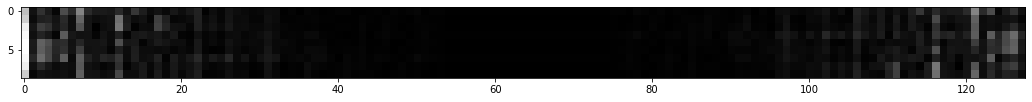

In [47]:
plt.figure(figsize = (18, 7))
plt.imshow(-train_features_fft[100], cmap = 'Greys') # negative so the darker values represent higher numbers.
plt.show()

In [50]:
np.save(f'../Data/UCI_train_features.npy', train_features_fft)
np.save(f'../Data/UCI_train_labels.npy', train_labels)
np.save(f'../Data/UCI_test_features.npy', test_features_fft)
np.save(f'../Data/UCI_test_labels.npy', test_labels)